# **TOPIC: The influence of marketing spend to sales 💸**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [ ]:
customer_df=pd.read_excel("/content/CustomersData.xlsx")

In [ ]:
discount_df=pd.read_csv("/content/Discount_Coupon.csv")

In [ ]:
sales_df=pd.read_csv("/content/Online_Sales.csv")

# **Data Profiling**

## **Descriptive Statistics**

### Customer data

In [ ]:
customer_df.sample(5)

,CustomerID,Gender,Location,Tenure_Months
653,17220,F,New York,19
723,15777,F,Chicago,24
881,14769,F,Chicago,26
1260,15218,M,New York,11
389,17519,F,New Jersey,46


In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


### Discount data

In [ ]:
discount_df.sample(5)

,Month,Product_Category,Coupon_Code,Discount_pct
17,Mar,Bags,AIO30,30
40,Feb,Accessories,ACC20,20
67,May,Bags,AIO20,20
128,Sep,Nest,NE30,30
49,Feb,Android,AND20,20


In [ ]:
discount_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


### Online sales data

In [ ]:
sales_df.sample(5)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
36545,13782,37431,9/5/2019,GGOEGOCB017499,Leatherette Journal,Office,1,6.15,6.00,Used
2071,15752,18082,1/17/2019,GGOEGOAB021699,Google Ballpoint Pen Black,Office,26,1.97,6.50,Used
50125,17811,46426,12/11/2019,GGOEGAEH090616,Google Tee Green,Apparel,10,17.93,53.78,Clicked
44181,12472,42089,10/30/2019,GGOEGOLC014299,Google Metallic Notebook Set,Office,25,4.79,27.62,Clicked
29995,14702,34344,8/1/2019,GGOEGOLC013299,Spiral Notebook and Pen Set,Office,10,3.35,19.02,Used


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


## **Fixing Datatypes**

### Customer data

In [ ]:
customer_df["Location"]=customer_df["Location"].astype("string")

In [ ]:
customer_df["Gender"]=customer_df["Gender"].astype("category")

Check the datatype again

In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   CustomerID     1468 non-null   int64   
 1   Gender         1468 non-null   category
 2   Location       1468 non-null   string  
 3   Tenure_Months  1468 non-null   int64   
dtypes: category(1), int64(2), string(1)
memory usage: 36.1 KB


### Discount data

In [ ]:
discount_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [ ]:
str_columns=["Product_Category","Coupon_Code"]
discount_df[str_columns]=discount_df[str_columns].astype("string")

### Online sales data

In [ ]:
str_columns=["Product_SKU","Product_Category","Product_Description","Coupon_Status"]
sales_df[str_columns]=sales_df[str_columns].astype("string")

In [ ]:
sales_df['Transaction_Date'] = pd.to_datetime(sales_df['Transaction_Date'], format="%m/%d/%Y", errors='coerce')
sales_df.sample(5)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
43983,13491,41973,2019-10-28,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,79.00,6.00,Used
37620,15596,37966,2019-09-12,GGOEGHPB071610,Google Twill Cap,Apparel,28,8.79,12.48,Clicked
27100,17841,32948,2019-07-17,GGOEGBMJ013399,Sport Bag,Bags,1,4.99,12.99,Used
5030,13081,20052,2019-02-09,GGOEAAWJ062549,Android Infant Short Sleeve Tee Pewter,Apparel,2,13.59,6.50,Clicked
28812,15271,33787,2019-07-26,GGOEGBPB021199,Google Slim Utility Travel Bag,Bags,1,8.39,12.91,Clicked


Check the data again

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  string        
 4   Product_Description  52924 non-null  string        
 5   Product_Category     52924 non-null  string        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(3), string(4)
memory usage: 4.0 MB


### Marketing Spend

In [ ]:
#mkt_spend_df['Date'] = pd.to_datetime(mkt_spend_df['Date'], errors='coerce')

In [ ]:
#mkt_spend_df.info()

## **Check consistency**

### Customer Data

In [ ]:
customer_df["Gender"].unique()

['M', 'F']
Categories (2, object): ['F', 'M']

In [ ]:
customer_df["Location"].unique()

<StringArray>
['Chicago', 'California', 'New York', 'New Jersey', 'Washington DC']
Length: 5, dtype: string

### Discount data

In [ ]:
discount_df["Month"].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [ ]:
discount_df["Product_Category"].unique()

<StringArray>
[             'Apparel',             'Nest-USA',               'Office',
            'Drinkware',            'Lifestyle',                 'Bags',
            'Notebooks',             'Headgear',                 'Nest',
                 'Waze',              'Bottles',          'Nest-Canada',
           'Housewares',          'Accessories',           'Gift Cards',
 'Notebooks & Journals',              'Android']
Length: 17, dtype: string

### Online sales data

In [ ]:
sales_df["Product_Category"].unique()

<StringArray>
[            'Nest-USA',               'Office',              'Apparel',
                 'Bags',            'Drinkware',            'Lifestyle',
 'Notebooks & Journals',             'Headgear',                 'Waze',
                  'Fun',          'Nest-Canada',            'Backpacks',
               'Google',              'Bottles',           'Gift Cards',
            'More Bags',           'Housewares',              'Android',
          'Accessories',                 'Nest']
Length: 20, dtype: string

In [ ]:
sales_df["Coupon_Status"].unique()

<StringArray>
['Used', 'Not Used', 'Clicked']
Length: 3, dtype: string

## **Detecting outliers**

In [ ]:
customer_df.describe()

,CustomerID,Tenure_Months
count,1468.000000,1468.000000
mean,15314.386240,25.912125
std,1744.000367,13.959667
min,12346.000000,2.000000
25%,13830.500000,14.000000
50%,15300.000000,26.000000
75%,16882.250000,38.000000
max,18283.000000,50.000000


In [ ]:
discount_df.describe()

,Discount_pct
count,204.000000
mean,20.000000
std,8.185052
min,10.000000
25%,10.000000
50%,20.000000
75%,30.000000
max,30.000000


In [ ]:
sales_df.describe()

,CustomerID,Transaction_ID,Transaction_Date,Quantity,Avg_Price,Delivery_Charges
count,52924.00000,52924.000000,52924,52924.000000,52924.000000,52924.000000
mean,15346.70981,32409.825675,2019-07-05 19:16:09.450532864,4.497638,52.237646,10.517630
min,12346.00000,16679.000000,2019-01-01 00:00:00,1.000000,0.390000,0.000000
25%,13869.00000,25384.000000,2019-04-12 00:00:00,1.000000,5.700000,6.000000
50%,15311.00000,32625.500000,2019-07-13 00:00:00,1.000000,16.990000,6.000000
75%,16996.25000,39126.250000,2019-09-27 00:00:00,2.000000,102.130000,6.500000
max,18283.00000,48497.000000,2019-12-31 00:00:00,900.000000,355.740000,521.360000
std,1766.55602,8648.668977,NaN,20.104711,64.006882,19.475613


In [ ]:
# Quartiles calcualtion
Q1 = sales_df['Quantity'].quantile(0.25)
Q3 = sales_df['Quantity'].quantile(0.75)

# IQR calculation
IQR = Q3 - Q1

# Lower and Upper bounds for non-outliers calculating
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
lower_bound

np.float64(-0.5)

In [ ]:
upper_bound

np.float64(3.5)

Let's check the product category that

In [ ]:
sales_df[sales_df["Quantity"]>3.5]

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used
5,17850,16682,2019-01-01,GGOEGBMJ013399,Sport Bag,Bags,15,5.15,6.50,Used
6,17850,16682,2019-01-01,GGOEGDHC018299,Google 22 oz Water Bottle,Drinkware,15,3.08,6.50,Not Used
7,17850,16682,2019-01-01,GGOEGDHG014499,Google Infuser-Top Water Bottle,Drinkware,15,10.31,6.50,Clicked
8,17850,16682,2019-01-01,GGOEGDWC020199,Engraved Ceramic Google Mug,Drinkware,5,9.27,6.50,Used
...,...,...,...,...,...,...,...,...,...,...
52906,12956,48482,2019-12-31,GGOEGAEJ028116,Google Women's Short Sleeve Badge Tee Grey,Apparel,4,3.47,6.50,Clicked
52907,12956,48482,2019-12-31,GGOEGAEQ027917,Google Women's Short Sleeve Hero Tee White,Apparel,4,3.47,6.50,Used
52910,15781,48488,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked


In [ ]:
sales_df[sales_df["Quantity"]>upper_bound]["Product_Category"].unique()

<StringArray>
[             'Apparel',                 'Bags',            'Drinkware',
               'Office', 'Notebooks & Journals',             'Headgear',
                  'Fun',            'Lifestyle',             'Nest-USA',
              'Bottles',            'More Bags',           'Housewares',
          'Nest-Canada',               'Google',                 'Waze',
            'Backpacks',           'Gift Cards',          'Accessories',
                 'Nest']
Length: 19, dtype: string

In [ ]:
Q=sales_df["Quantity"].quantile(0.99)

In [ ]:
sales_df[sales_df["Quantity"]>Q]["Transaction_ID"].count()

np.int64(484)

In [ ]:
cond1=sales_df["Quantity"]<=Q

#### Detecting outliers - Avg_Price

In [ ]:
# Quartiles calcualtion
Q1 = sales_df['Avg_Price'].quantile(0.25)
Q3 = sales_df['Avg_Price'].quantile(0.75)

# IQR calculation
IQR = Q3 - Q1

# Lower and Upper bounds for non-outliers calculating
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
lower_bound

np.float64(-138.945)

In [ ]:
upper_bound

np.float64(246.77499999999998)

In [ ]:
sales_df[sales_df["Avg_Price"]>upper_bound]

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
61,17850,16704,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,256.88,6.5,Used
3099,14449,18803,2019-01-25,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,256.88,6.5,Clicked
3261,15061,18898,2019-01-26,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,256.88,6.5,Clicked
3262,15061,18899,2019-01-26,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,256.88,6.5,Used
3692,13402,19137,2019-01-30,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,256.88,6.5,Clicked
...,...,...,...,...,...,...,...,...,...,...
52828,17105,48421,2019-12-30,GGOENEBQ092299,Nest Secure Alarm System Starter Pack - USA,Nest,1,355.74,6.5,Clicked
52832,17105,48424,2019-12-30,GGOENEBQ092299,Nest Secure Alarm System Starter Pack - USA,Nest,1,355.74,6.5,Used
52837,17105,48428,2019-12-30,GGOENEBQ092299,Nest Secure Alarm System Starter Pack - USA,Nest,1,355.74,6.5,Used
52873,14606,48456,2019-12-31,GGOENEBQ092299,Nest Secure Alarm System Starter Pack - USA,Nest,1,355.74,6.5,Used


In [ ]:
sales_df[sales_df["Avg_Price"]>upper_bound]["Product_Category"].unique()

<StringArray>
['Nest-USA', 'Gift Cards', 'Nest']
Length: 3, dtype: string

In [ ]:
Q=sales_df["Avg_Price"].quantile(0.99)
Q

np.float64(279.0)

In [ ]:
sales_df[sales_df["Avg_Price"]>Q]["Transaction_ID"].count()

np.int64(499)

In [ ]:
cond2=sales_df["Avg_Price"]<=Q

#### Detecting outliers: Delivery Charges

In [ ]:
# Quartiles calcualtion
Q1 = sales_df['Delivery_Charges'].quantile(0.25)
Q3 = sales_df['Delivery_Charges'].quantile(0.75)

# IQR calculation
IQR = Q3 - Q1

# Lower and Upper bounds for non-outliers calculating
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
upper_bound

np.float64(7.25)

In [ ]:
sales_df[sales_df['Delivery_Charges'] > upper_bound]

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
26,12583,16692,2019-01-01,GGOEAFKQ020599,Android Sticker Sheet Ultra Removable,Office,1,2.47,102.79,Used
27,12583,16692,2019-01-01,GGOEGDHC015299,23 oz Wide Mouth Sport Bottle,Drinkware,26,8.72,102.79,Clicked
28,12583,16692,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,1.64,102.79,Clicked
29,12583,16692,2019-01-01,GGOEYFKQ020699,YouTube Custom Decals,Office,1,1.64,102.79,Clicked
30,12583,16692,2019-01-01,GGOEYOCR078099,YouTube Spiral Journal with Pen,Notebooks & Journals,26,7.93,102.79,Not Used
...,...,...,...,...,...,...,...,...,...,...
52879,14606,48460,2019-12-31,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,151.88,12.99,Used
52887,14606,48467,2019-12-31,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,151.88,12.99,Clicked
52888,14606,48467,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,12.99,Not Used
52895,12956,48474,2019-12-31,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,100.91,19.99,Not Used


In [ ]:
Q=sales_df["Delivery_Charges"].quantile(0.99)

In [ ]:
cond3=sales_df["Delivery_Charges"]<=Q

In [ ]:
sales_df_cleaned=sales_df[cond1 & cond2 & cond3]

In [ ]:
sales_df_cleaned.describe()

,CustomerID,Transaction_ID,Transaction_Date,Quantity,Avg_Price,Delivery_Charges
count,51494.000000,51494.000000,51494,51494.000000,51494.000000,51494.000000
mean,15351.424768,32373.767332,2019-07-05 09:23:59.189031936,3.032781,50.117950,9.004906
min,12346.000000,16679.000000,2019-01-01 00:00:00,1.000000,0.390000,0.000000
25%,13871.000000,25417.000000,2019-04-12 00:00:00,1.000000,5.700000,6.000000
50%,15311.000000,32566.000000,2019-07-13 00:00:00,1.000000,16.990000,6.000000
75%,17017.000000,38973.750000,2019-09-25 00:00:00,2.000000,100.910000,6.500000
max,18283.000000,48497.000000,2019-12-31 00:00:00,60.000000,279.000000,75.000000
std,1766.814682,8601.270750,NaN,6.436807,57.461475,8.650091


In [ ]:
sales_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51494 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           51494 non-null  int64         
 1   Transaction_ID       51494 non-null  int64         
 2   Transaction_Date     51494 non-null  datetime64[ns]
 3   Product_SKU          51494 non-null  string        
 4   Product_Description  51494 non-null  string        
 5   Product_Category     51494 non-null  string        
 6   Quantity             51494 non-null  int64         
 7   Avg_Price            51494 non-null  float64       
 8   Delivery_Charges     51494 non-null  float64       
 9   Coupon_Status        51494 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(3), string(4)
memory usage: 4.3 MB


📌 **Key takeaway:**
- The dataset is influenced by large number of outliers came from 2 main factors: high value products and bulk purchase.
- However, the abondant of these outliers can lead to inaccuracy of the business performance.

## **Merge DataFrame**

In [ ]:
merged_df = pd.merge(sales_df_cleaned, customer_df, on='CustomerID', how='left')

# Extract the month from the 'Transaction_Date' in the merged_df
merged_df['Month'] = merged_df['Transaction_Date'].dt.strftime('%b') # Extracting abbreviated month name

# Merge the dataframe with discount_df on 'Product_Category' and 'Month'
final_df = pd.merge(merged_df, discount_df, on=['Product_Category', 'Month'], how='left')

final_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Month,Coupon_Code,Discount_pct
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Jan,ELEC10,10.0
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Jan,ELEC10,10.0
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,M,Chicago,12,Jan,OFF10,10.0
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,M,Chicago,12,Jan,SALE10,10.0
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,M,Chicago,12,Jan,AIO10,10.0


In [ ]:
final_df[final_df['Delivery_Charges'] > 40]

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Month,Coupon_Code,Discount_pct
279,17850,16885,2019-01-03,GGOEGDHQ015399,26 oz Double Wall Insulated Bottle,Drinkware,26,19.83,74.74,Not Used,M,Chicago,12,Jan,EXTRA10,10.0
280,17850,16885,2019-01-03,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,5,1.64,74.74,Clicked,M,Chicago,12,Jan,OFF10,10.0
281,17850,16885,2019-01-03,GGOEGFKQ020799,Google Doodle Decal,Office,3,2.89,74.74,Clicked,M,Chicago,12,Jan,OFF10,10.0
282,17850,16885,2019-01-03,GGOEYFKQ020699,YouTube Custom Decals,Office,5,1.64,74.74,Clicked,M,Chicago,12,Jan,OFF10,10.0
283,17850,16885,2019-01-03,GGOEYOLR018699,YouTube Leatherette Notebook Combo,Office,26,5.55,74.74,Clicked,M,Chicago,12,Jan,OFF10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49642,17337,47057,2019-12-15,GGOEGDHC087099,Google Thermal Bottle Blue,Drinkware,2,24.45,75.00,Not Used,F,California,44,Dec,EXTRA30,30.0
49643,17337,47057,2019-12-15,GGOEGDHH087299,Google Thermal Bottle Green,Drinkware,2,24.45,75.00,Clicked,F,California,44,Dec,EXTRA30,30.0
49644,17337,47057,2019-12-15,GGOEGDHR086999,Google Thermal Bottle Red,Drinkware,1,24.45,75.00,Not Used,F,California,44,Dec,EXTRA30,30.0
49645,17337,47057,2019-12-15,GGOEGDHT087199,Google Thermal Bottle Yellow,Drinkware,1,24.45,75.00,Clicked,F,California,44,Dec,EXTRA30,30.0


### Check duplicates

In [ ]:
final_df.duplicated().sum()

np.int64(0)

### Check missing values

In [ ]:
final_df.isnull().sum()

,0
CustomerID,0
Transaction_ID,0
Transaction_Date,0
Product_SKU,0
Product_Description,0
Product_Category,0
Quantity,0
Avg_Price,0
Delivery_Charges,0
Coupon_Status,0


In [ ]:
final_df[final_df["Coupon_Code"].isnull()]

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Month,Coupon_Code,Discount_pct
57,17850,16704,2019-01-01,GGOEYOBR078599,YouTube Luggage Tag,Fun,4,9.27,6.50,Used,M,Chicago,12,Jan,<NA>,NaN
90,14688,16742,2019-01-02,GGOEGBRD079699,25L Classic Rucksack,Backpacks,1,103.15,6.50,Clicked,F,New York,46,Jan,<NA>,NaN
152,18074,16782,2019-01-02,GGOEGOBC078699,Google Luggage Tag,Fun,1,7.42,6.50,Used,F,California,10,Jan,<NA>,NaN
173,16029,16800,2019-01-02,GGOEAOBH078799,Android Luggage Tag,Fun,2,7.42,6.50,Not Used,F,Washington DC,40,Jan,<NA>,NaN
188,16250,16812,2019-01-02,GGOEGDHG082499,Google 25 oz Clear Stainless Steel Bottle,Google,1,11.54,17.96,Clicked,F,California,30,Jan,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43197,12472,42109,2019-10-30,GGOEGBRD079699,25L Classic Rucksack,Backpacks,1,79.99,6.00,Clicked,F,New Jersey,2,Oct,<NA>,NaN
44101,14911,42756,2019-11-07,GGOEGBRD079699,25L Classic Rucksack,Backpacks,1,79.99,6.00,Not Used,F,California,34,Nov,<NA>,NaN
44706,18125,43244,2019-11-12,GGOEGBRD079699,25L Classic Rucksack,Backpacks,1,99.99,6.00,Clicked,F,Chicago,3,Nov,<NA>,NaN
45121,17180,43537,2019-11-15,GGOEGBRD079699,25L Classic Rucksack,Backpacks,1,79.99,6.00,Used,F,Chicago,35,Nov,<NA>,NaN


Why there is null?

In [ ]:
discount_df["Product_Category"].unique()

<StringArray>
[             'Apparel',             'Nest-USA',               'Office',
            'Drinkware',            'Lifestyle',                 'Bags',
            'Notebooks',             'Headgear',                 'Nest',
                 'Waze',              'Bottles',          'Nest-Canada',
           'Housewares',          'Accessories',           'Gift Cards',
 'Notebooks & Journals',              'Android']
Length: 17, dtype: string

In [ ]:
sales_df["Product_Category"].unique()

<StringArray>
[            'Nest-USA',               'Office',              'Apparel',
                 'Bags',            'Drinkware',            'Lifestyle',
 'Notebooks & Journals',             'Headgear',                 'Waze',
                  'Fun',          'Nest-Canada',            'Backpacks',
               'Google',              'Bottles',           'Gift Cards',
            'More Bags',           'Housewares',              'Android',
          'Accessories',                 'Nest']
Length: 20, dtype: string

**Key takeaway:**
- There are 4 product category did not be listed in the discount data (Fun, Google, More Bags, Backpacks).
- Meanwhile, in discount dataset have "Notebooks", but it was not listed in the sales dataset.

**SOLUTION:** drop all the null values

In [ ]:
final_df=final_df.dropna()

In [ ]:
final_df.isnull().sum()

,0
CustomerID,0
Transaction_ID,0
Transaction_Date,0
Product_SKU,0
Product_Description,0
Product_Category,0
Quantity,0
Avg_Price,0
Delivery_Charges,0
Coupon_Status,0


🧹 Now the dataset is cleaned!

### Qualify the dataset

This dataset does not provide information about the location of the e-commerce business. In addition, an e-commerce company may operate multiple warehouses in different regions. As a result, delivery charges are not a reliable metric for analyzing relationships in this case.

In [ ]:
###cdelivery_charges_by_region = final_df[final_df["Product_Category"]=="Nest-USA"].groupby('Location')['Delivery_Charges'].mean().reset_index()
## delivery_charges_by_region


Therefore, for the purpose of this analysis, we will exclude delivery charges and location from consideration.

In [ ]:
## final_df.drop(columns="Delivery_Charges",inplace=True)

In [ ]:
## final_df.drop(columns="Location",inplace=True)

Next, to simplify the calculation, I will divide the discount percentage by 100 to convert it into its decimal form for further computations.

In [ ]:
final_df["Discount_pct"]=final_df["Discount_pct"]/100
final_df.sample(10)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Month,Coupon_Code,Discount_pct
204,12431,16823,2019-01-03,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,4,153.71,6.50,Clicked,F,New Jersey,14,Jan,ELEC10,0.1
4241,13013,19615,2019-02-03,GGOEGATB060413,Google Women's Quilted Insulated Vest Black,Apparel,1,59.99,35.96,Not Used,M,Chicago,13,Feb,SALE20,0.2
39224,15498,39370,2019-09-29,GGOEYAAB031813,YouTube Men's Short Sleeve Hero Tee Black,Apparel,1,16.99,12.99,Clicked,F,New York,14,Sep,SALE30,0.3
8819,13089,22844,2019-03-14,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,119.00,6.50,Used,F,New Jersey,25,Mar,ELEC30,0.3
1759,13777,17906,2019-01-15,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,122.77,6.50,Used,F,California,7,Jan,ELEC10,0.1
42265,16531,41467,2019-10-23,GGOEGBRJ037299,Google Alpine Style Backpack,Bags,1,79.99,6.00,Not Used,M,New Jersey,28,Oct,AIO10,0.1
26218,18116,32792,2019-07-16,GGOEGAEC033114,Google Men's Long Sleeve Raglan Ocean Blue,Apparel,1,17.49,6.00,Used,F,Chicago,38,Jul,SALE10,0.1
5519,15332,20474,2019-02-15,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,149.00,6.50,Used,F,California,30,Feb,ELEC20,0.2
36606,15296,37809,2019-09-10,GGOENEBQ086499,Nest Cam IQ - USA,Nest,1,199.00,19.99,Used,M,California,40,Sep,NE30,0.3
3137,17567,18886,2019-01-26,GGOEGAEQ027913,Google Women's Short Sleeve Hero Tee White,Apparel,5,14.02,74.74,Clicked,F,California,9,Jan,SALE10,0.1


Check the dataset again

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51104 entries, 0 to 51493
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           51104 non-null  int64         
 1   Transaction_ID       51104 non-null  int64         
 2   Transaction_Date     51104 non-null  datetime64[ns]
 3   Product_SKU          51104 non-null  string        
 4   Product_Description  51104 non-null  string        
 5   Product_Category     51104 non-null  string        
 6   Quantity             51104 non-null  int64         
 7   Avg_Price            51104 non-null  float64       
 8   Delivery_Charges     51104 non-null  float64       
 9   Coupon_Status        51104 non-null  string        
 10  Gender               51104 non-null  category      
 11  Location             51104 non-null  string        
 12  Tenure_Months        51104 non-null  int64         
 13  Month                51104 non-null 

Calculate the total price for each transaction followed by these formula:
- Coupon used: Purchase_Amount = Quantity * Avg_Price * (1-Discount_pct)
- Coupon not used: Purchase_Amount = Quantity * Avg_Price

In [ ]:
final_df["Purchase_Amount"] = np.where(
    final_df["Coupon_Status"] == "Used",
    (final_df["Quantity"] * final_df["Avg_Price"] * (1 - final_df["Discount_pct"])) + final_df["Delivery_Charges"],
    (final_df["Quantity"] * final_df["Avg_Price"]) + final_df["Delivery_Charges"])
final_df.sample(5)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Month,Coupon_Code,Discount_pct,Purchase_Amount
20896,16134,29937,2019-06-08,GGOEGAEJ030814,Google Women's Long Sleeve Blended Cardigan Ch...,Apparel,1,23.99,6.00,Used,F,New York,5,Jun,SALE30,0.3,22.793
39837,13969,39751,2019-10-04,GGOENEBQ086799,Nest Thermostat E - USA,Nest,3,99.00,12.99,Not Used,F,New York,15,Oct,NE10,0.1,309.990
13355,15856,25703,2019-04-16,GGOEGAAJ080614,Google Men's Bike Short Sleeve Tee Charcoal,Apparel,1,15.99,6.00,Not Used,M,Chicago,4,Apr,SALE10,0.1,21.990
44731,18125,43264,2019-11-13,GGOEGADB059618,Google Men's Quilted Insulated Vest Black,Apparel,1,15.00,6.00,Used,F,Chicago,3,Nov,SALE20,0.2,18.000
27906,15464,33640,2019-07-25,GGOEGAEJ028013,Google Women's Short Sleeve Hero Tee Grey,Apparel,1,4.08,6.00,Not Used,F,Chicago,40,Jul,SALE10,0.1,10.080


In [ ]:
final_df["Discount_Amount"] = np.where(
    final_df["Coupon_Status"] == "Used",
    final_df["Quantity"] * final_df["Avg_Price"] * final_df["Discount_pct"],
    0
)
final_df.sample(5)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Month,Coupon_Code,Discount_pct,Purchase_Amount,Discount_Amount
32890,14669,36064,2019-08-19,GGOEAAEJ030914,Android Women's Long Sleeve Blended Cardigan Grey,Apparel,1,12.00,6.0,Used,F,New York,39,Aug,SALE20,0.2,15.60,2.4
33921,12652,36546,2019-08-24,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,149.00,6.0,Clicked,M,New York,21,Aug,ELEC20,0.2,155.00,0.0
15851,15503,27121,2019-05-03,GGOEGAEB084513,BLM Sweatshirt,Apparel,1,33.59,6.0,Clicked,F,New York,45,May,SALE20,0.2,39.59,0.0
31541,14911,35420,2019-08-12,GGOEGAAJ032617,Google Men's Short Sleeve Badge Tee Charcoal,Apparel,1,10.63,6.0,Clicked,F,California,34,Aug,SALE20,0.2,16.63,0.0
7117,16143,21643,2019-03-01,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,79.00,6.5,Used,F,California,9,Mar,ELEC30,0.3,283.00,118.5


In [ ]:
final_df["Gross_Revenue"] = final_df["Avg_Price"] * final_df["Quantity"]
final_df.sample(5)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Month,Coupon_Code,Discount_pct,Purchase_Amount,Discount_Amount,Gross_Revenue
10360,17419,24019,2019-03-24,GGOEAFKQ020599,Android Sticker Sheet Ultra Removable,Office,2,2.99,14.41,Used,F,New York,48,Mar,OFF30,0.3,18.596,1.794,5.98
31177,14755,35226,2019-08-10,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,1,119.00,6.00,Used,F,New Jersey,50,Aug,ELEC20,0.2,101.200,23.800,119.00
7283,17965,21726,2019-03-02,GGOEGDHB072099,Google Insulated Stainless Steel Bottle,Drinkware,1,19.99,6.50,Clicked,F,Chicago,7,Mar,EXTRA30,0.3,26.490,0.000,19.99
43298,17735,42170,2019-10-30,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,99.00,6.00,Clicked,M,New Jersey,49,Oct,NE10,0.1,105.000,0.000,99.00
1557,13468,17759,2019-01-13,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,81.50,6.50,Clicked,M,New York,33,Jan,ELEC10,0.1,414.000,0.000,407.50


Remove abundant columns

In [ ]:
final_df.drop(columns="Coupon_Code",inplace=True)

In [ ]:
final_df.sample(5)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Month,Discount_pct,Purchase_Amount,Discount_Amount,Gross_Revenue
50818,13137,47914,2019-12-22,GGOEGDHC018299,Google 22 oz Water Bottle,Drinkware,8,2.44,6.5,Used,M,California,37,Dec,0.3,20.164,5.856,19.52
17801,17303,28177,2019-05-16,GGOEYDHJ019399,24 oz YouTube Sergeant Stripe Bottle,Drinkware,1,6.39,6.0,Clicked,F,Chicago,39,May,0.2,12.390,0.000,6.39
49958,13800,47296,2019-12-18,GGOEYALQ091913,YouTube Women's Favorite Tee White,Apparel,1,17.93,6.5,Not Used,F,California,27,Dec,0.3,24.430,0.000,17.93
14354,12471,26242,2019-04-22,GGOEGAQB036013,Google Women's Fleece Hoodie,Apparel,1,44.79,6.0,Used,F,California,11,Apr,0.1,46.311,4.479,44.79
23542,17007,31390,2019-06-27,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,149.00,6.0,Used,F,Chicago,3,Jun,0.3,110.300,44.700,149.00


# Deliver vs Location

# **Exploratory Data Analysis**

## **Business Performance Analysis**

### Daily sales

In [ ]:
jan_daily_sales = final_df[final_df["Transaction_Date"].dt.month==1].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
feb_daily_sales = final_df[final_df["Transaction_Date"].dt.month==2].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
mar_daily_sales = final_df[final_df["Transaction_Date"].dt.month==3].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
apr_daily_sales = final_df[final_df["Transaction_Date"].dt.month==4].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
may_daily_sales = final_df[final_df["Transaction_Date"].dt.month==5].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
jun_daily_sales = final_df[final_df["Transaction_Date"].dt.month==6].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
jul_daily_sales = final_df[final_df["Transaction_Date"].dt.month==7].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
aug_daily_sales = final_df[final_df["Transaction_Date"].dt.month==8].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
sep_daily_sales = final_df[final_df["Transaction_Date"].dt.month==9].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
oct_daily_sales = final_df[final_df["Transaction_Date"].dt.month==10].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
nov_daily_sales = final_df[final_df["Transaction_Date"].dt.month==11].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
dec_daily_sales = final_df[final_df["Transaction_Date"].dt.month==12].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()

In [ ]:
daily_sales = final_df.groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
daily_sales

,Transaction_Date,Purchase_Amount
0,2019-01-01,7226.103
1,2019-01-02,13733.753
2,2019-01-03,23509.280
3,2019-01-04,17400.702
4,2019-01-05,14343.428
...,...,...
360,2019-12-27,12596.663
361,2019-12-28,9152.232
362,2019-12-29,10913.672
363,2019-12-30,6571.729


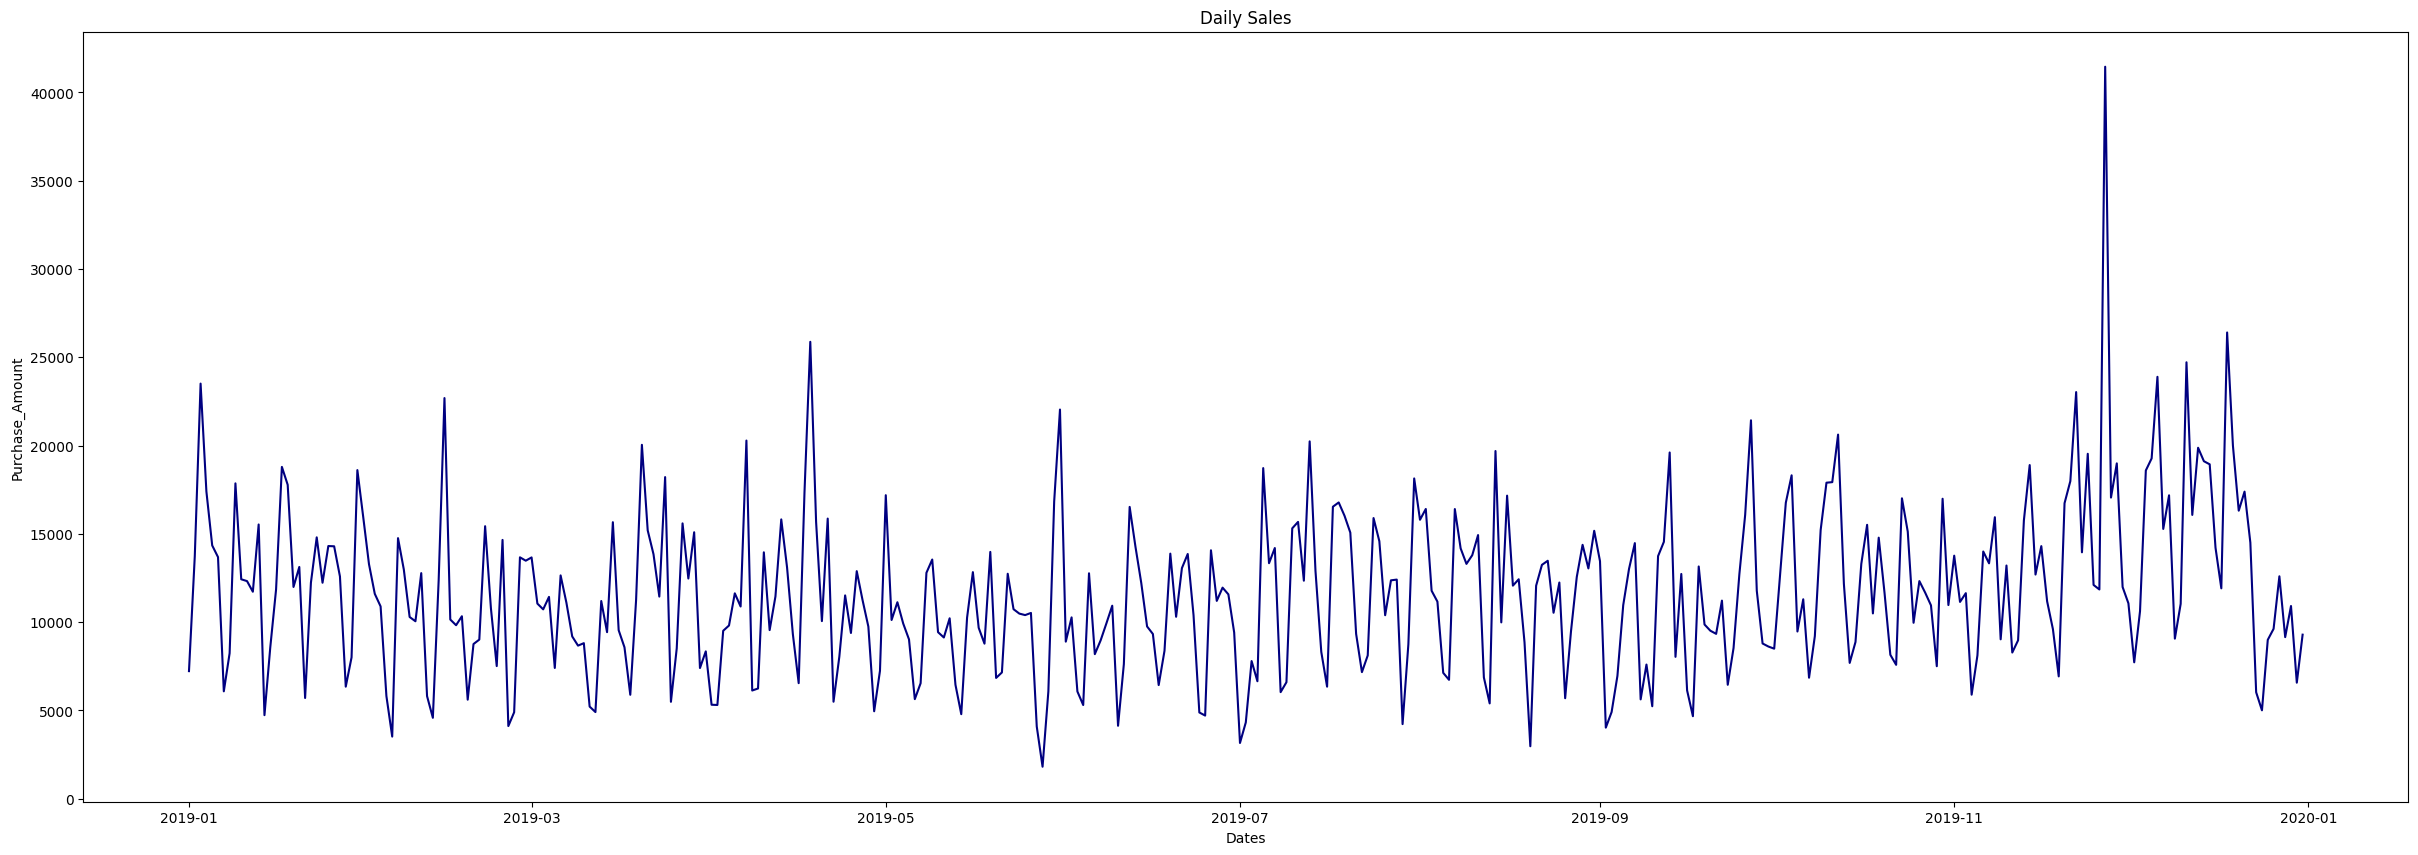

In [ ]:
plt.figure(figsize=(30, 10))

plt.plot(daily_sales["Transaction_Date"], daily_sales["Purchase_Amount"], color="navy")
plt.xlabel("Dates")
plt.ylabel("Purchase_Amount")
plt.title("Daily Sales")
plt.show()

In [ ]:
highest_date = daily_sales.loc[daily_sales["Purchase_Amount"].idxmax(), "Transaction_Date"]
print(highest_date)

2019-11-27 00:00:00


What happen in 27/11/2019?

In [ ]:
final_df[final_df["Transaction_Date"]=="2019-11-27"]

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Month,Discount_pct,Purchase_Amount,Discount_Amount,Gross_Revenue
46452,14502,44697,2019-11-27,GGOEAFKA087599,Android Large Removable Sticker Sheet,Accessories,1,2.39,6.5,Clicked,M,Chicago,22,Nov,0.2,8.89,0.0,2.39
46453,14502,44697,2019-11-27,GGOEGBRJ037299,Google Alpine Style Backpack,Bags,1,79.99,6.5,Clicked,M,Chicago,22,Nov,0.2,86.49,0.0,79.99
46454,14502,44697,2019-11-27,GGOEGBRJ037399,Google Rucksack,Bags,1,55.99,6.5,Clicked,M,Chicago,22,Nov,0.2,62.49,0.0,55.99
46455,14502,44697,2019-11-27,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.39,6.5,Clicked,M,Chicago,22,Nov,0.2,8.89,0.0,2.39
46456,14502,44697,2019-11-27,GGOEGHPB071610,Google Twill Cap,Apparel,1,8.79,6.5,Clicked,M,Chicago,22,Nov,0.2,15.29,0.0,8.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46752,17220,44956,2019-11-27,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,119.00,6.5,Clicked,F,New York,19,Nov,0.2,125.50,0.0,119.00
46753,17220,44956,2019-11-27,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,1,119.00,6.5,Used,F,New York,19,Nov,0.2,101.70,23.8,119.00
46754,17220,44957,2019-11-27,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,149.00,6.5,Not Used,F,New York,19,Nov,0.2,155.50,0.0,149.00
46755,17220,44958,2019-11-27,GGOENEBD084799,Nest Learning Thermostat 3rd Gen-USA - Copper,Nest-USA,1,149.00,6.5,Used,F,New York,19,Nov,0.2,125.70,29.8,149.00


In [ ]:
final_df[final_df["Transaction_Date"]=="2019-11-27"].groupby("CustomerID")["Purchase_Amount"].sum()

,Purchase_Amount
CustomerID,
12528,4300.390
12720,2286.366
12731,7003.284
12841,1769.000
13089,1616.428
13324,728.000
13396,204.500
13615,105.500
13784,69.700


VVIP customerIDs:  

### Monthly total sales

Introduction: **Monthly total sales** is a key performance metric that measures **the total revenue generated from all transactions within a given month**. It helps businesses track sales trends over time, identify seasonal patterns, and evaluate the effectiveness of marketing or promotional activities.

In [ ]:
# Calculate total price by month
monthly_sales = final_df.groupby('Month')['Purchase_Amount'].sum().reset_index()

monthly_sales.sort_values(by="Purchase_Amount",ascending=False)

,Month,Purchase_Amount
2,Dec,441362.764
9,Nov,427380.412
4,Jan,396031.059
10,Oct,387446.078
1,Aug,368922.334
5,Jul,357765.843
7,Mar,338022.905
0,Apr,330195.985
11,Sep,313223.101
8,May,311178.254


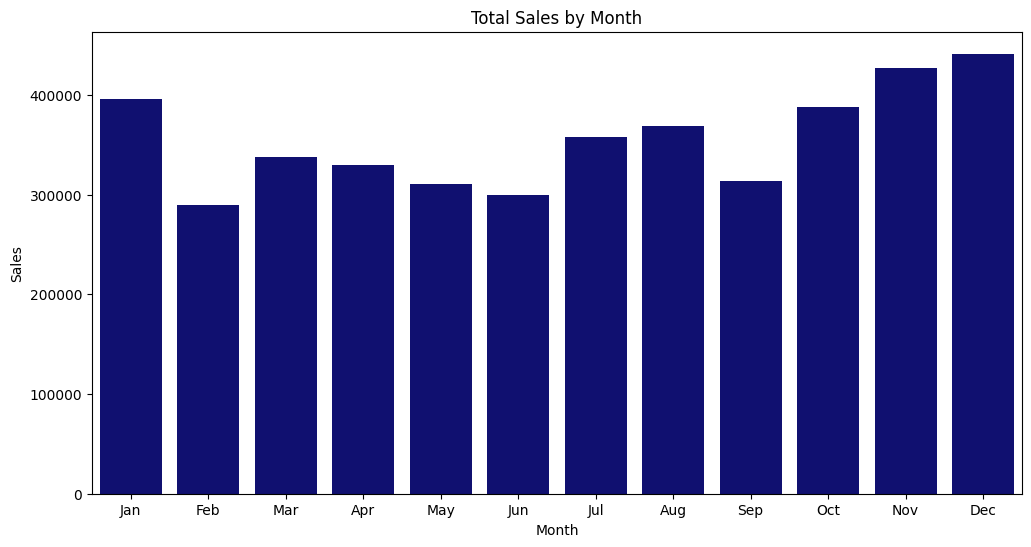

In [ ]:
# Define the order of months for plotting
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Month", y="Purchase_Amount", data=monthly_sales, order=month_order, color="navy")
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

📌 **Key takeaway:**
- November and December are months that have highest sales
- May and Jun are the least profitable months

### **Purchase Frequency**

**Purchase frequency** measures on average, how often each customer make transaction within specific period of time.

In [ ]:
number_of_transaction=final_df["Transaction_ID"].count()
print(f"Total number of transaction over 12 months: {number_of_transaction}")

Total number of transaction over 12 months: 51104


In [ ]:
number_of_customer=final_df["CustomerID"].nunique()
print(f"Total number of unique customers: {number_of_customer}")

Total number of unique customers: 1466


In [ ]:
purchase_frequency=number_of_transaction/number_of_customer
print(f"Purchase frequency: {purchase_frequency}")

Purchase frequency: 34.85948158253752


Low sales months (February, May, June):

In [ ]:
number_of_customer_in_Feb=final_df[final_df["Transaction_Date"].dt.month==2]["CustomerID"].nunique()
number_of_transaction_in_Feb=final_df[final_df["Transaction_Date"].dt.month==2]["Transaction_ID"].unique().size
purchase_frequency_in_Feb=round((number_of_transaction_in_Feb/number_of_customer_in_Feb),2)
print(f"Purchase frequency in February: {purchase_frequency_in_Feb}")

Purchase frequency in February: 14.93


In [ ]:
number_of_customer_in_May=final_df[final_df["Transaction_Date"].dt.month==5]["CustomerID"].nunique()
number_of_transaction_in_May=final_df[final_df["Transaction_Date"].dt.month==5]["Transaction_ID"].unique().size
purchase_frequency_in_May=round((number_of_transaction_in_May/number_of_customer_in_May),2)
print(f"Purchase frequency in May: {purchase_frequency_in_May}")

Purchase frequency in May: 10.04


In [ ]:
number_of_customer_in_Jun=final_df[final_df["Transaction_Date"].dt.month==6]["CustomerID"].nunique()
number_of_transaction_in_Jun=final_df[final_df["Transaction_Date"].dt.month==6]["Transaction_ID"].unique().size
purchase_frequency_in_Jun=round((number_of_transaction_in_Jun/number_of_customer_in_Jun),2)
print(f"Purchase frequency in June: {purchase_frequency_in_Jun}")

Purchase frequency in June: 7.39


High sales months (Nov, Dec)

In [ ]:
number_of_customer_in_Nov=final_df[final_df["Transaction_Date"].dt.month==11]["CustomerID"].nunique()
number_of_transaction_in_Nov=final_df[final_df["Transaction_Date"].dt.month==11]["Transaction_ID"].unique().size
purchase_frequency_in_Nov=round((number_of_transaction_in_Nov/number_of_customer_in_Nov),2)
print(f"Purchase frequency in November: {purchase_frequency_in_Nov}")

Purchase frequency in November: 11.63


In [ ]:
number_of_customer_in_Dec=final_df[final_df["Transaction_Date"].dt.month==12]["CustomerID"].nunique()
number_of_transaction_in_Dec=final_df[final_df["Transaction_Date"].dt.month==12]["Transaction_ID"].unique().size
purchase_frequency_in_Dec=round((number_of_transaction_in_Dec/number_of_customer_in_Dec),2)
print(f"Purchase frequency in December: {purchase_frequency_in_Dec}")

Purchase frequency in December: 11.06


### **Average Value per transaction**

**Average value per transaction** measures the average amount spent by customers in a single purchase.

In [ ]:
# Total average value
total_sales = final_df["Purchase_Amount"].sum()
number_of_transaction = final_df["Transaction_ID"].unique().size
avg_value_per_transaction = total_sales / number_of_transaction
avg_value_per_transaction = avg_value_per_transaction.round(3)
print(f"Avg value per transaction: {avg_value_per_transaction}")

Avg value per transaction: 173.926


*Low sales month (February, May, June)*

In [ ]:
total_sales_in_Feb = final_df[final_df["Transaction_Date"].dt.month == 2]["Purchase_Amount"].sum()

# Average value per transaction
avg_value_per_transaction_in_Feb = total_sales_in_Feb / number_of_transaction_in_Feb
avg_value_per_transaction_in_Feb=avg_value_per_transaction_in_Feb.round(3)
print(f"Avg value in February: {avg_value_per_transaction_in_Feb}")

Avg value in February: 178.031


In [ ]:
total_sales_in_May = final_df[final_df["Transaction_Date"].dt.month == 5]["Purchase_Amount"].sum()

# Average value per transaction
avg_value_per_transaction_in_May = total_sales_in_May / number_of_transaction_in_May
avg_value_per_transaction_in_May = avg_value_per_transaction_in_May.round(3)
print(f"Avg value in May: {avg_value_per_transaction_in_May}")

Avg value in May: 155.046


In [ ]:
total_sales_in_Jun = final_df[final_df["Transaction_Date"].dt.month == 6]["Purchase_Amount"].sum()

# Average value per transaction
avg_value_per_transaction_in_Jun = total_sales_in_Jun / number_of_transaction_in_Jun
avg_value_per_transaction_in_Jun = avg_value_per_transaction_in_Jun.round(3)
print(f"Avg value in June: {avg_value_per_transaction_in_Jun}")

Avg value in June: 156.38


*High sales month (Nov, Dec)*

In [ ]:
total_sales_in_Nov = final_df[final_df["Transaction_Date"].dt.month == 11]["Purchase_Amount"].sum()

# Average value per transaction
avg_value_per_transaction_in_Nov = total_sales_in_Nov / number_of_transaction_in_Nov
avg_value_per_transaction_in_Nov = avg_value_per_transaction_in_Nov.round(3)
print(f"Avg value in November: {avg_value_per_transaction_in_Nov}")

Avg value in November: 196.587


In [ ]:
total_sales_in_Dec = final_df[final_df["Transaction_Date"].dt.month == 12]["Purchase_Amount"].sum()

# Average value per transaction
avg_value_per_transaction_in_Dec = total_sales_in_Dec / number_of_transaction_in_Dec
avg_value_per_transaction_in_Dec = avg_value_per_transaction_in_Dec.round(3)
print(f"Avg value in December: {avg_value_per_transaction_in_Dec}")

Avg value in December: 169.105


📌 **Summary of the findings**

Let's summarize all the calculations above into one readable table to compare and contrast the performance in a broad perspective.

In [ ]:
summary=pd.DataFrame(
    {'Month': ['Feb','May','Jun','Nov','Dec'],
     'Total sale': [total_sales_in_Feb,total_sales_in_May,total_sales_in_Jun,total_sales_in_Nov, total_sales_in_Dec],
     'Number of transaction' : [number_of_transaction_in_Feb,number_of_transaction_in_May,number_of_transaction_in_Jun,number_of_transaction_in_Nov,number_of_transaction_in_Dec],
     'Avg_value_per_transaction': [avg_value_per_transaction_in_Feb,avg_value_per_transaction_in_May,avg_value_per_transaction_in_Jun,avg_value_per_transaction_in_Nov,avg_value_per_transaction_in_Dec],
     'Number of unique customers': [number_of_customer_in_Feb,number_of_customer_in_May,number_of_customer_in_Jun,number_of_customer_in_Nov,number_of_customer_in_Dec],
     'Purchase_Frequency': [purchase_frequency_in_Feb,purchase_frequency_in_May,purchase_frequency_in_Jun,purchase_frequency_in_Nov,purchase_frequency_in_Dec]
    }
)

In [ ]:
! pip install tabulate

from tabulate import tabulate

col_names = ["Month", "Total sale ($)", "No. of transaction", "Avg basket value ($)", "No. of unique customers","Purchase_Frequency"]

print(tabulate(summary, headers=col_names, tablefmt="pipe"))

|    | Month   |   Total sale ($) |   No. of transaction |   Avg basket value ($) |   No. of unique customers |   Purchase_Frequency |
|---:|:--------|-----------------:|---------------------:|-----------------------:|--------------------------:|---------------------:|
|  0 | Feb     |           289657 |                 1627 |                178.031 |                       109 |                14.93 |
|  1 | May     |           311178 |                 2007 |                155.046 |                       200 |                10.04 |
|  2 | Jun     |           299311 |                 1914 |                156.38  |                       259 |                 7.39 |
|  3 | Nov     |           427380 |                 2174 |                196.587 |                       187 |                11.63 |
|  4 | Dec     |           441363 |                 2610 |                169.105 |                       236 |                11.06 |


📍 **Key Insights:**

The revenue of the company fluctuated depending on the seasonal factors
- Peak revenue months (Nov, Dec): Driven by holidays and demand for high-value products.
> **Strategy:** Launch targeted holiday campaigns, offer premium bundles, and ensure strong inventory planning.
- Feb, May and June had low revenue. However, each month shows different purchasing patterns of customers:
  - Feb: This month had a small but highly loyal customer base that made frequent and high-value purchases.
  - May: Sales came from a larger number of customers compared to Feb, but spending per purchase was smaller, and purchase frequency dropped.
  - Jun: Large reach in terms of unique customers, but low engagement — many customers made only once or few purchases.
> **Strategy:** Use volume discounts, product bundling, and cross-selling to boost average transaction value.

## **Focused Analysis**

### Product tier classification

In [ ]:
product_tier = final_df.groupby('Product_Category')['Avg_Price'].mean().reset_index().round(2)
product_tier.sort_values(by='Avg_Price', ascending=False)

,Product_Category,Avg_Price
11,Nest-Canada,157.09
10,Nest,148.09
12,Nest-USA,124.33
6,Gift Cards,111.36
3,Bags,30.47
2,Apparel,19.78
7,Headgear,15.91
1,Android,15.90
13,Notebooks & Journals,11.81
5,Drinkware,10.82


I clasify 3 product tiers:
- **High tier:** Gift Cards, Nest-USA, Nest, Nest-Canada (avg_price >= 100)
- **Mid tier:** Bags, Apparel, Android, Headgear (avg_price >= 15)
- **Low tier:** others (avg_price < 15)

In [ ]:
low_threshold = product_tier["Avg_Price"].quantile(0.33)
high_threshold = product_tier["Avg_Price"].quantile(0.66)

In [ ]:
low_threshold

np.float64(8.205)

In [ ]:
high_threshold

np.float64(19.393)

In [ ]:
low_threshold = 15
high_threshold = 100

# Classification function
def classify_price(price):
    if price < low_threshold:
        return 'Low'
    elif price < high_threshold:
        return 'Mid'
    else:
        return 'High'

# Apply classification
product_tier['Tier'] = product_tier['Avg_Price'].apply(classify_price)

product_tier.sort_values(by='Avg_Price', ascending=False)

,Product_Category,Avg_Price,Tier
11,Nest-Canada,157.09,High
10,Nest,148.09,High
12,Nest-USA,124.33,High
6,Gift Cards,111.36,High
3,Bags,30.47,Mid
2,Apparel,19.78,Mid
7,Headgear,15.91,Mid
1,Android,15.90,Mid
13,Notebooks & Journals,11.81,Low
5,Drinkware,10.82,Low


In [ ]:
product_tier=product_tier.drop(columns="Avg_Price")

In [ ]:
merged_data_2 = pd.merge(final_df, product_tier, on='Product_Category', how='inner')
merged_data_2

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Month,Discount_pct,Purchase_Amount,Discount_Amount,Gross_Revenue,Tier
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,M,Chicago,12,Jan,0.1,144.839,15.371,153.71,High
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,M,Chicago,12,Jan,0.1,144.839,15.371,153.71,High
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,M,Chicago,12,Jan,0.1,8.345,0.205,2.05,Low
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,M,Chicago,12,Jan,0.1,94.150,0.000,87.65,Mid
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,M,Chicago,12,Jan,0.1,21.350,1.650,16.50,Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51099,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,F,New York,45,Dec,0.3,127.800,0.000,121.30,High
51100,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,F,New York,45,Dec,0.3,40.744,14.676,48.92,Mid
51101,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,F,New York,45,Dec,0.3,112.816,45.564,151.88,High
51102,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,F,California,7,Dec,0.3,409.100,0.000,402.60,High


Check the new data:

In [ ]:
merged_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51104 entries, 0 to 51103
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           51104 non-null  int64         
 1   Transaction_ID       51104 non-null  int64         
 2   Transaction_Date     51104 non-null  datetime64[ns]
 3   Product_SKU          51104 non-null  string        
 4   Product_Description  51104 non-null  string        
 5   Product_Category     51104 non-null  string        
 6   Quantity             51104 non-null  int64         
 7   Avg_Price            51104 non-null  float64       
 8   Delivery_Charges     51104 non-null  float64       
 9   Coupon_Status        51104 non-null  string        
 10  Gender               51104 non-null  category      
 11  Location             51104 non-null  string        
 12  Tenure_Months        51104 non-null  int64         
 13  Month                51104 non-

In [ ]:
merged_data_2["Tier"]=merged_data_2["Tier"].astype("category")

In [ ]:
sales_by_product_tier=merged_data_2.groupby("Tier")["Purchase_Amount"].mean().reset_index().round(2)
sales_by_product_tier

/tmp/ipython-input-3467790080.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_product_tier=merged_data_2.groupby("Tier")["Purchase_Amount"].mean().reset_index().round(2)


,Tier,Purchase_Amount
0,High,178.90
1,Low,38.64
2,Mid,39.41


In [ ]:
qty_by_product_tier=merged_data_2.groupby("Tier")["Quantity"].mean().reset_index().round(2)
qty_by_product_tier

/tmp/ipython-input-1787475720.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  qty_by_product_tier=merged_data_2.groupby("Tier")["Quantity"].mean().reset_index().round(2)


,Tier,Quantity
0,High,1.51
1,Low,6.38
2,Mid,1.89


**Key takeaway:**
- High-tier: high Premium product is key product bring high revenue.
- Low-tier products has the highest quantity purchased.
--> Focus on premium strategies, exclusive program for high value product
--> Focus on discount and bulk purchase for mid-level product to increase quantity

In [ ]:
# High tier monthly sales
monthly_sales_by_high_tier=merged_data_2[merged_data_2["Tier"]=="High"].groupby(["Month"])["Purchase_Amount"].sum().reset_index().round(1)

#Mid tier monthly sales
monthly_sales_by_mid_tier=merged_data_2[merged_data_2["Tier"]=="Mid"].groupby(["Month"])["Purchase_Amount"].sum().reset_index().round(1)

#Mid tier montly sales
monthly_sales_by_low_tier=merged_data_2[merged_data_2["Tier"]=="Low"].groupby(["Month"])["Purchase_Amount"].sum().reset_index().round(1)

In [ ]:
summary=pd.DataFrame(
    {'Month': monthly_sales["Month"],
     'High': monthly_sales_by_high_tier["Purchase_Amount"],
     'Mid': monthly_sales_by_mid_tier["Purchase_Amount"],
     'Low': monthly_sales_by_low_tier["Purchase_Amount"]
    }
)

In [ ]:
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Convert to categorical with the specified order
summary["Month"] = pd.Categorical(summary["Month"], categories=month_order, ordered=True)

# Sort by Month in that order
summary = summary.sort_values("Month").reset_index(drop=True)

summary

,Month,High,Mid,Low
0,Jan,294613.9,55606.1,45811.1
1,Feb,194598.2,56506.6,38551.9
2,Mar,193393.1,84524.2,60105.7
3,Apr,189424.3,92348.6,48423.1
4,May,174246.4,80346.2,56585.6
5,Jun,193629.0,62592.0,43089.6
6,Jul,218214.7,82643.4,56907.8
7,Aug,216212.2,89175.5,63534.7
8,Sep,203605.9,64129.5,45487.7
9,Oct,302868.4,42047.0,42530.7


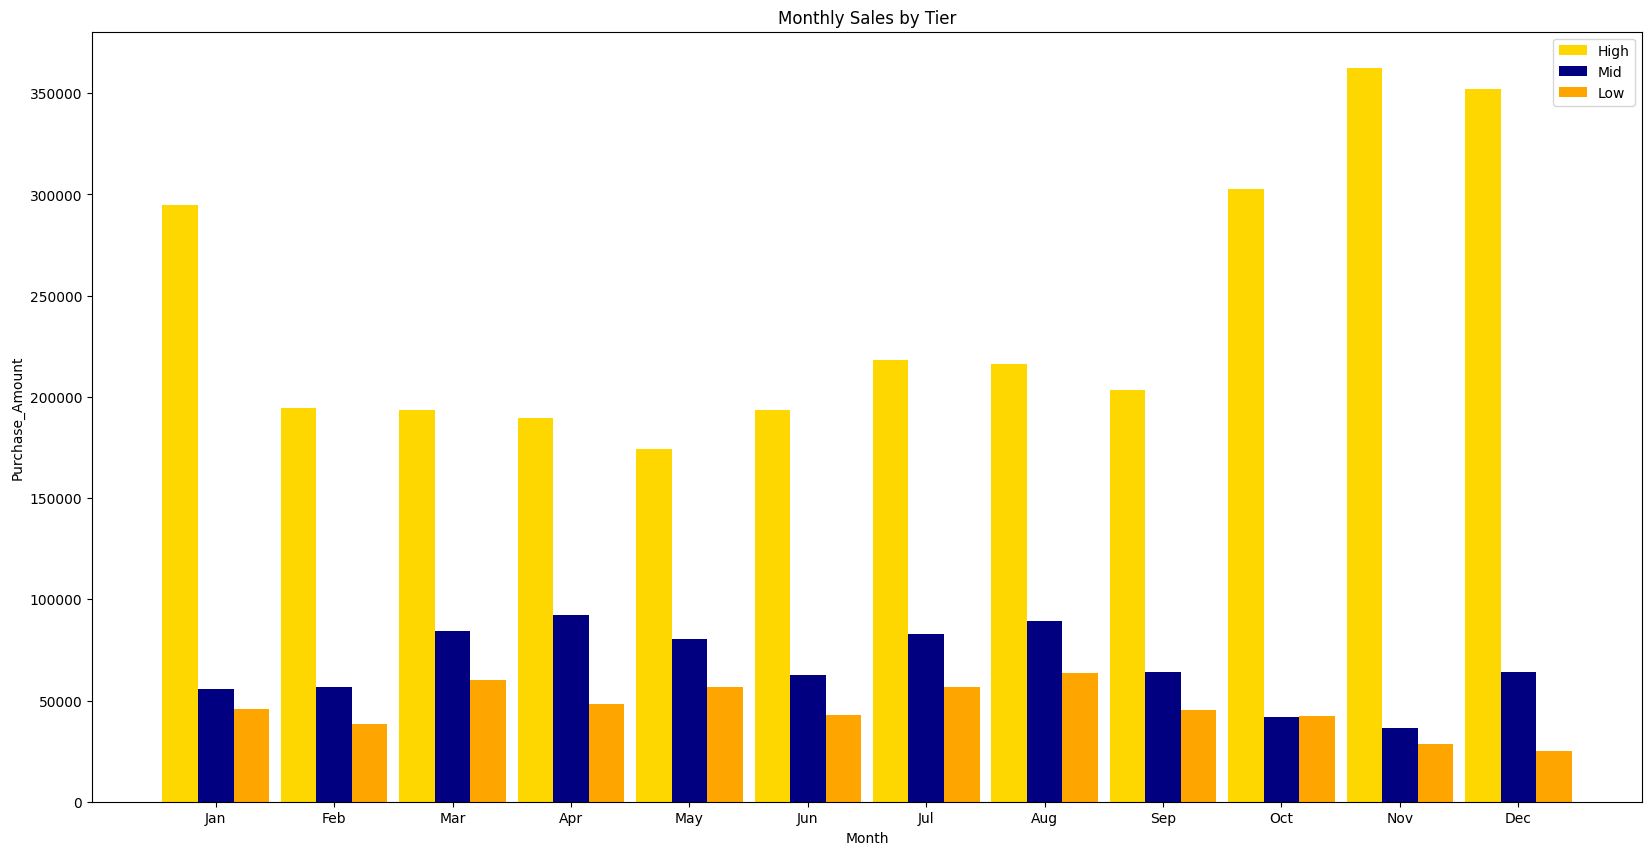

In [ ]:
plt.figure(figsize=(20, 10))

width = 0.3
values=np.arange(len(summary["Month"]))

plt.bar(values - width,summary["High"],width, label="High", color="gold")
plt.bar(values,summary["Mid"], width, label="Mid", color="navy")
plt.bar(values + width,summary["Low"], width, label="Low", color="orange")
plt.title("Monthly Sales by Tier")
plt.xlabel("Month")
plt.ylabel("Purchase_Amount")
plt.xticks(values, summary["Month"])
plt.legend()
plt.show()


📌**Key takeaway:**
- High-tier sales are heavily skewed toward year-end and early-year months.
- Mid-tier sales fluctuate, hitting the lowest point at year-end.
- Low-tier sales remain consistent throughout the year but make up the smallest share of total sales.
- In April, both mid- and low-tier sales reach their annual peak, while high-tier sales are low; total sales remain stable.

> **Problem:** Over-reliance on high-tier products. Sales could grow significantly by boosting all tiers.

> **Job-to-be-Done:** Achieve balanced growth across tiers by identifying key products to prioritize and low-impact products to phase out.

### Product category's potential evaluation

Given the scarcity of resources, it is essential for the company to identify and prioritize product categories that generate the highest profitability.

Conversely, product categories with low productivity and poor efficiency should be evaluated for possible reduction or elimination to optimize costs and improve overall operational efficiency.

In [ ]:
top_purchase_by_product_cat = final_df.groupby('Product_Category')['Transaction_ID'].count().reset_index()
top_purchase_by_product_cat.sort_values(by="Transaction_ID",ascending=False)

,Product_Category,Transaction_ID
2,Apparel,17951
12,Nest-USA,14010
14,Office,6157
5,Drinkware,3355
9,Lifestyle,2993
3,Bags,1813
10,Nest,1699
7,Headgear,759
13,Notebooks & Journals,698
15,Waze,548


📌**Key takeaway:**
- The highest product categories volumn: Apparel, Nest-USA, Office
- The least product categories volumn: Gift Cards, Housewares, Android

In [ ]:
total_sales_by_product_cat = final_df.groupby('Product_Category')['Purchase_Amount'].sum().reset_index()
total_sales_by_product_cat["Percentage"]=(total_sales_by_product_cat["Purchase_Amount"]/total_sales_by_product_cat["Purchase_Amount"].sum()*100).round(2)
total_sales_by_product_cat.sort_values(by="Percentage",ascending=False)

,Product_Category,Purchase_Amount,Percentage
12,Nest-USA,2481484.571,58.24
2,Apparel,651873.795,15.30
10,Nest,326662.708,7.67
14,Office,216701.697,5.09
5,Drinkware,173441.076,4.07
3,Bags,127312.187,2.99
9,Lifestyle,82475.576,1.94
11,Nest-Canada,68670.822,1.61
13,Notebooks & Journals,52338.785,1.23
7,Headgear,30317.555,0.71


📌**Key takeaway:**
- The top profitable product categories: Nest-USA, Apparel, Nest
- The least profitable product categories: Waze, Housewares, Android

📍 **Outcome:**
- We should invest more and focus on top profitable products including Nest-USA, Apparel, Nest, and Office as our key products.
- The product that have the least revenue and the lowest productivity such as Housewares and Android should be considered to sacrifice and not spend too much money on that.

Create dataframe of top 2 key categories and low profitable ones to analyze their performance.


In [ ]:
nest_usa_df=final_df[final_df["Product_Category"]=="Nest-USA"]
apparel_df=final_df[final_df["Product_Category"]=="Apparel"]

In [ ]:
housewares_df=final_df[final_df["Product_Category"]=="Housewares"]
android_df=final_df[final_df["Product_Category"]=="Android"]

#### High profitable category: Nest-USA

In [ ]:
nest_usa_monthly_sales = nest_usa_df.groupby("Month")["Purchase_Amount"].sum().reset_index().round(2)
nest_usa_monthly_sales

,Month,Purchase_Amount
0,Apr,183083.49
1,Aug,190332.89
2,Dec,264864.85
3,Feb,190372.49
4,Jan,285529.96
5,Jul,209954.86
6,Jun,183754.11
7,Mar,185897.86
8,May,169136.38
9,Nov,254619.05


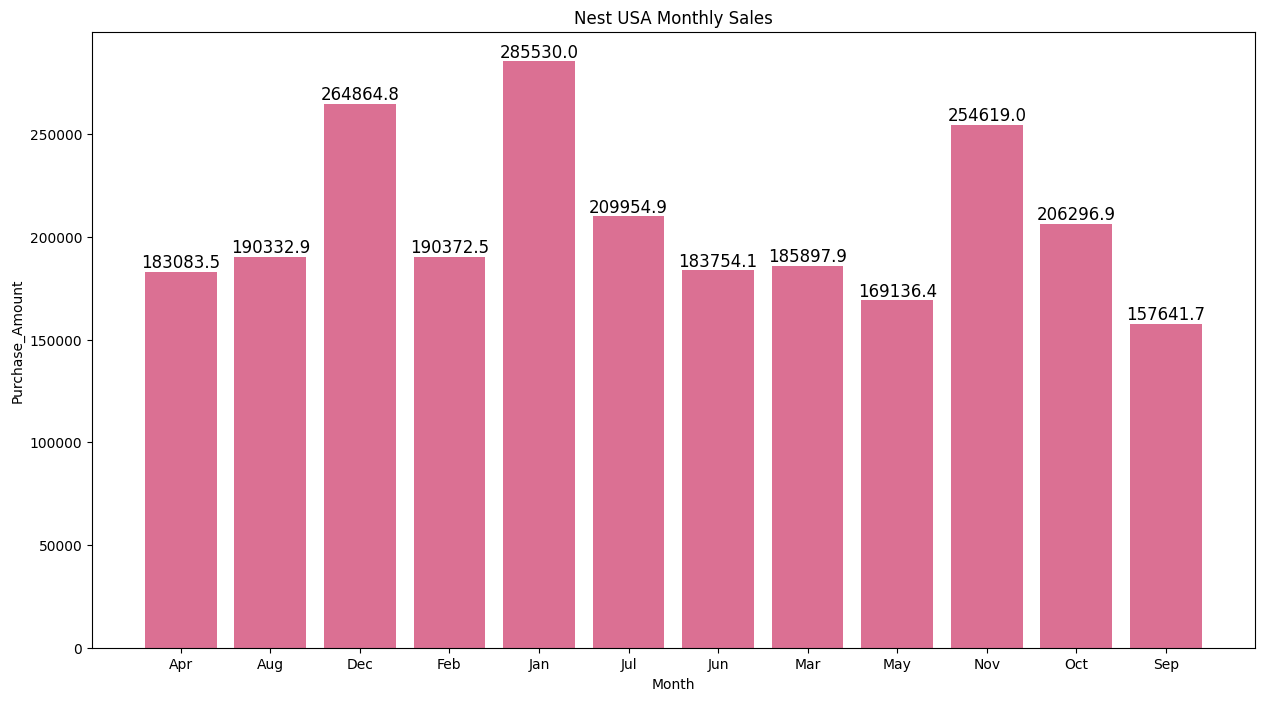

In [ ]:
# Plot the bar chart
plt.figure(figsize=(15, 8))
bar = plt.bar(nest_usa_monthly_sales["Month"], nest_usa_monthly_sales["Purchase_Amount"],color="palevioletred")
for bar in bar:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=12)
plt.title('Nest USA Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Purchase_Amount')
plt.show()

In [ ]:
nest_usa_sales_by_product = nest_usa_df.groupby("Product_SKU")["Purchase_Amount"].sum().reset_index()
nest_usa_sales_by_product = nest_usa_sales_by_product.sort_values(by='Purchase_Amount',ascending=False)
nest_usa_sales_by_product

,Product_SKU,Purchase_Amount
4,GGOENEBJ079499,666774.042
5,GGOENEBQ078999,612774.705
0,GGOENEBB078899,517367.286
6,GGOENEBQ079099,209053.655
7,GGOENEBQ079199,205476.058
8,GGOENEBQ084699,196975.260
3,GGOENEBD084799,68030.588
2,GGOENEBB079399,2555.927
1,GGOENEBB079299,2477.050


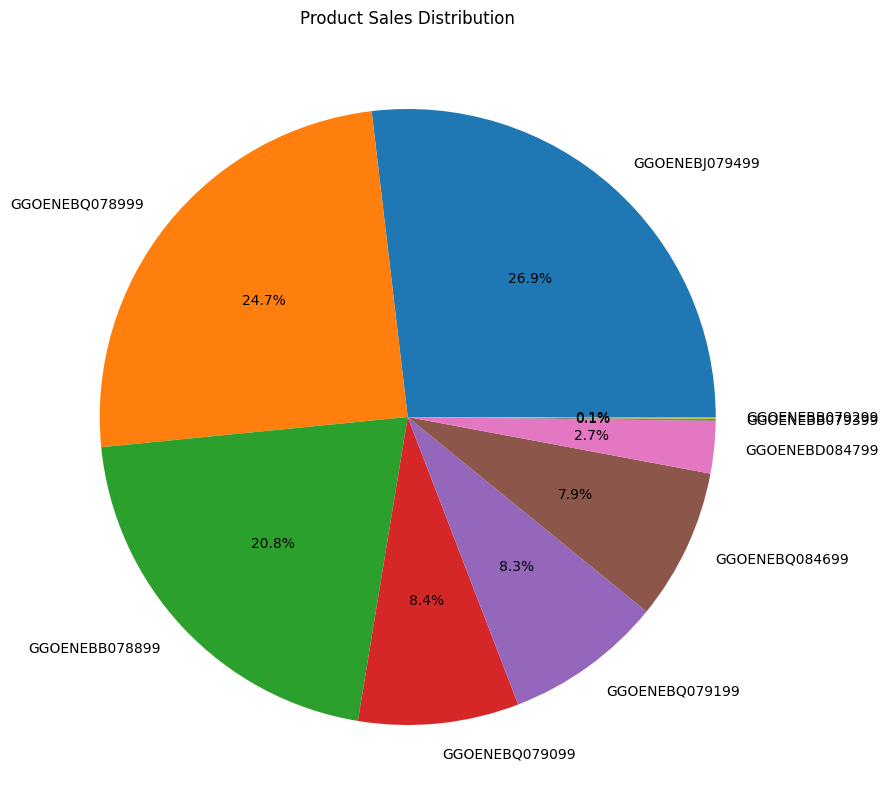

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(nest_usa_sales_by_product['Purchase_Amount'],
        labels=nest_usa_sales_by_product["Product_SKU"],
        autopct='%1.1f%%',
       )
plt.title("Product Sales Distribution")
plt.show()

In [ ]:
nest_usa_df[nest_usa_df["Product_SKU"].isin(["GGOENEBJ079499","GGOENEBQ078999","GGOENEBB078899"])]["Product_Description"].unique()

<StringArray>
['Nest Learning Thermostat 3rd Gen-USA - Stainless Steel',
                 'Nest Cam Outdoor Security Camera - USA',
                  'Nest Cam Indoor Security Camera - USA']
Length: 3, dtype: string

📍 **Summary:**
- Nest-USA was most purchased in year-end months
- Top 3 best seller products were Nest Learning Thermostat 3rd, outdoor security camera and indoor security camera, accounted over 2/3 of total sales of category

#### High profitable category: Apparel

In [ ]:
apparel_monthly_sales = apparel_df.groupby("Month")["Purchase_Amount"].sum().reset_index()
apparel_monthly_sales

,Month,Purchase_Amount
0,Apr,80011.182
1,Aug,70420.146
2,Dec,53585.477
3,Feb,41371.914
4,Jan,42651.194
5,Jul,68570.226
6,Jun,53074.683
7,Mar,67843.394
8,May,68311.058
9,Nov,23074.546


Sort the monthly sales by month order.

In [ ]:
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Convert to categorical with the specified order
apparel_monthly_sales["Month"] = pd.Categorical(apparel_monthly_sales["Month"], categories=month_order, ordered=True)

# Sort by Month in that order
apparel_monthly_sales = apparel_monthly_sales.sort_values("Month").reset_index(drop=True)

apparel_monthly_sales

,Month,Purchase_Amount
0,Jan,42651.194
1,Feb,41371.914
2,Mar,67843.394
3,Apr,80011.182
4,May,68311.058
5,Jun,53074.683
6,Jul,68570.226
7,Aug,70420.146
8,Sep,54455.067
9,Oct,28504.908


/tmp/ipython-input-2742076688.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


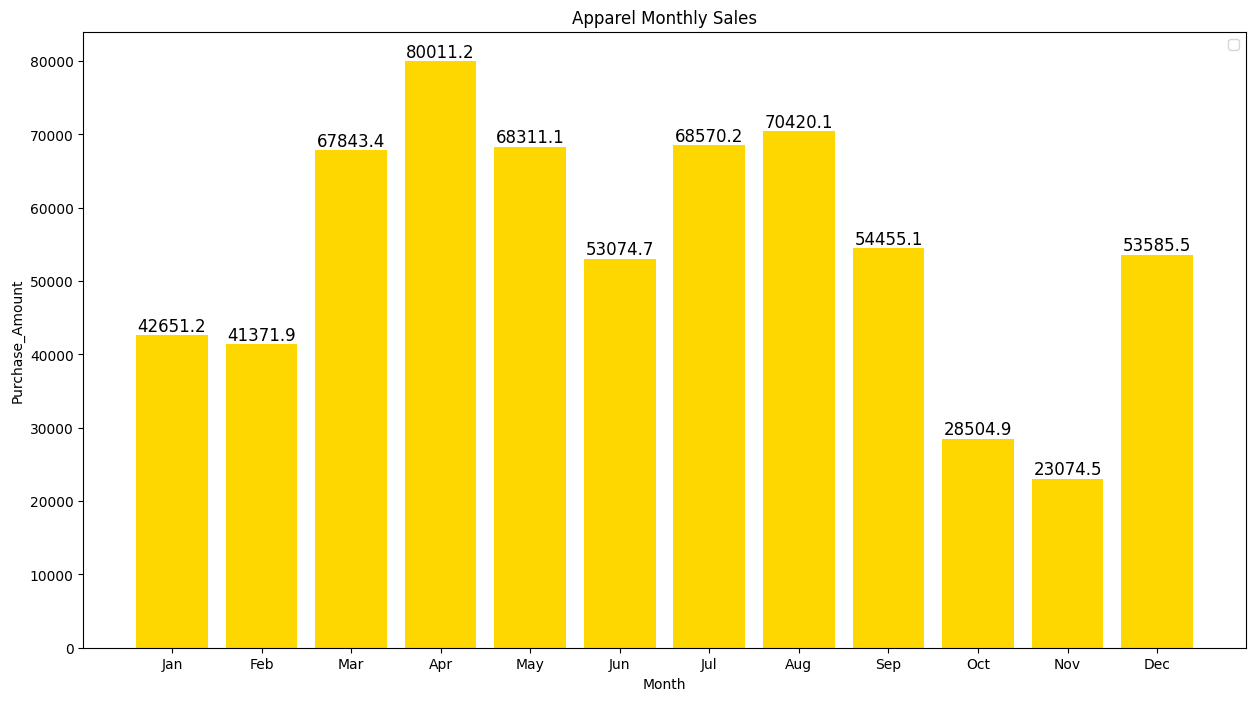

In [ ]:
plt.figure(figsize=(15, 8))
bar = plt.bar(apparel_monthly_sales["Month"], apparel_monthly_sales["Purchase_Amount"],color="gold")
for bar in bar:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=12)
plt.title('Apparel Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Purchase_Amount')
plt.legend()
plt.show()

Top 3 best-seller products:

In [ ]:
apparel_sales_by_product = apparel_df.groupby("Product_SKU")["Purchase_Amount"].sum().reset_index()
apparel_sales_by_product = apparel_sales_by_product.sort_values(by='Purchase_Amount',ascending=False)
apparel_sales_by_product

,Product_SKU,Purchase_Amount
810,GGOEGHPB071610,18432.381
490,GGOEGAFB035815,12260.325
489,GGOEGAFB035814,8569.483
267,GGOEGAAQ010415,6738.732
174,GGOEGAAB010515,6730.413
...,...,...
845,GGOEYAEB030014,18.591
908,GGOEYAXB089630,17.910
767,GGOEGAXR066029,16.630
873,GGOEYAEJ029616,15.490


In [ ]:
apparel_df[apparel_df["Product_SKU"].isin(["GGOEGHPB071610","GGOEGAFB035815","GGOEYHPB072210"])]["Product_Description"].unique()

<StringArray>
['Google Twill Cap', 'YouTube Twill Cap', "Google Men's  Zip Hoodie"]
Length: 3, dtype: string

In [ ]:
apparel_df["Quantity"].max()

55

In [ ]:
apparel_montly_qty = apparel_df.groupby("Month")["Quantity"].mean().reset_index().round(2)
apparel_montly_qty

,Month,Quantity
0,Apr,1.95
1,Aug,1.38
2,Dec,1.93
3,Feb,1.52
4,Jan,1.39
5,Jul,1.63
6,Jun,1.42
7,Mar,1.59
8,May,1.36
9,Nov,1.62


📍 **Summary:**

- Bán nhiều vào các tháng (kh phải sale cao)

#### Low profitable category: Housewares

Text(0.5, 1.0, 'Housewares Daily Sales')

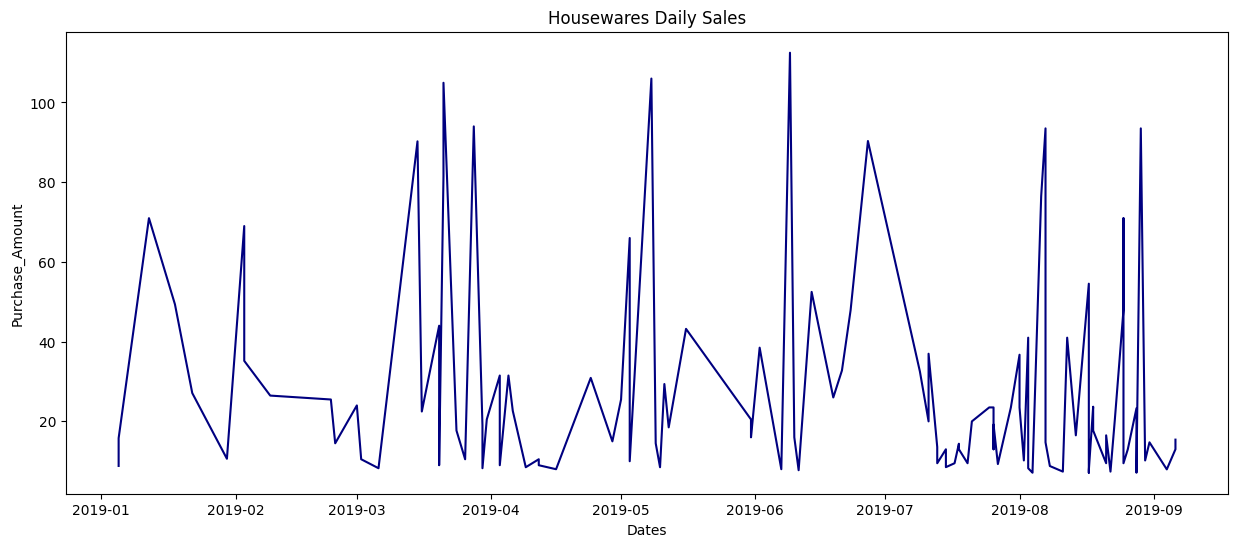

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(housewares_df["Transaction_Date"],housewares_df["Purchase_Amount"],color="navy")
plt.xlabel("Dates")
plt.ylabel("Purchase_Amount")
plt.title("Housewares Daily Sales")

In [ ]:
housewares_monthly_sales = housewares_df.groupby('Month')['Purchase_Amount'].sum().reset_index()
housewares_monthly_sales

,Month,Purchase_Amount
0,Apr,176.55
1,Aug,847.52
2,Feb,170.64
3,Jan,182.68
4,Jul,312.44
5,Jun,432.21
6,Mar,580.68
7,May,358.06
8,Sep,36.38


In [ ]:
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Convert to categorical with the specified order
housewares_monthly_sales["Month"] = pd.Categorical(housewares_monthly_sales["Month"], categories=month_order, ordered=True)

# Sort by Month in that order
housewares_monthly_sales = housewares_monthly_sales.sort_values("Month").reset_index(drop=True)

housewares_monthly_sales

,Month,Purchase_Amount
0,Jan,182.68
1,Feb,170.64
2,Mar,580.68
3,Apr,176.55
4,May,358.06
5,Jun,432.21
6,Jul,312.44
7,Aug,847.52
8,Sep,36.38


In [ ]:
housewares_monthly_quantity = housewares_df.groupby("Month")["Quantity"].mean().reset_index().round(2)
housewares_monthly_quantity

,Month,Quantity
0,Apr,3.80
1,Aug,11.97
2,Feb,7.60
3,Jan,9.67
4,Jul,5.11
5,Jun,17.70
6,Mar,11.62
7,May,11.36
8,Sep,3.00


In [ ]:
housewares_df["Avg_Price"].mean()

np.float64(2.065855855855856)

📌 **Key takeaway:** Housewares product category had low sales (there was even no sales in year-end months) but the quantity sold is much higher than the average quantity sold of other top sell products.
> Suggestions: create limited editions, product innovations and sell with higher values.

#### Low profitable category: Android

Text(0.5, 1.0, 'Android Sales')

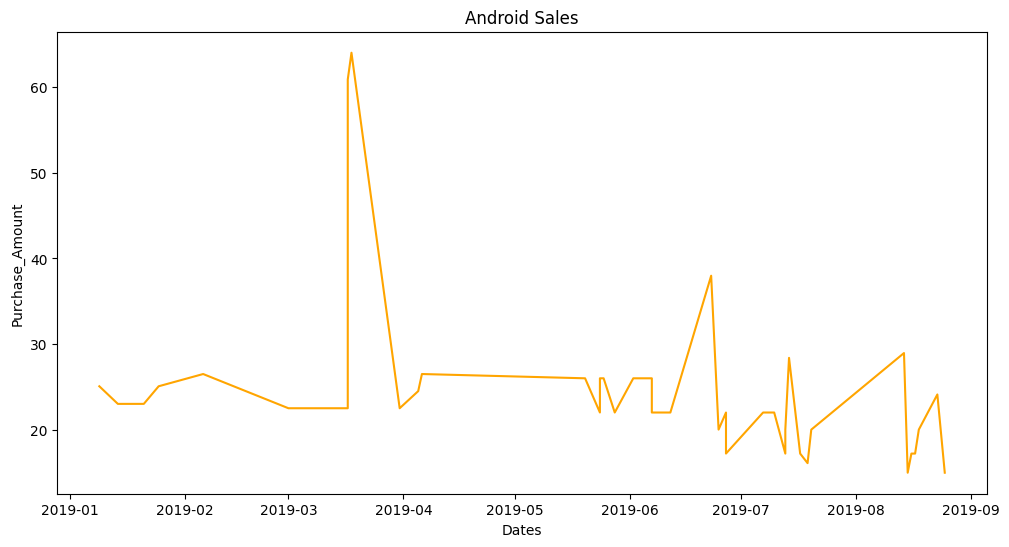

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(android_df["Transaction_Date"],android_df["Purchase_Amount"],color="orange")
plt.xlabel("Dates")
plt.ylabel("Purchase_Amount")
plt.title("Android Sales")

In [ ]:
android_monthly_sales=android_df.groupby("Month")["Purchase_Amount"].sum().reset_index()
android_monthly_sales = android_monthly_sales.sort_values('Month')
android_monthly_sales

,Month,Purchase_Amount
0,Apr,50.981
1,Aug,137.316
2,Feb,26.490
3,Jan,96.116
4,Jul,162.791
5,Jun,215.106
6,Mar,237.423
7,May,121.950


In [ ]:
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Convert to categorical with the specified order
android_monthly_sales["Month"] = pd.Categorical(android_monthly_sales["Month"], categories=month_order, ordered=True)

# Sort by Month in that order
android_monthly_sales = android_monthly_sales.sort_values("Month").reset_index(drop=True)

android_monthly_sales

,Month,Purchase_Amount
0,Jan,96.116
1,Feb,26.490
2,Mar,237.423
3,Apr,50.981
4,May,121.950
5,Jun,215.106
6,Jul,162.791
7,Aug,137.316


In [ ]:
android_monthly_quantity = android_df.groupby("Month")["Quantity"].mean().reset_index().round(2)
android_monthly_quantity

,Month,Quantity
0,Apr,1.00
1,Aug,1.00
2,Feb,1.00
3,Jan,1.00
4,Jul,1.12
5,Jun,1.11
6,Mar,1.00
7,May,1.00


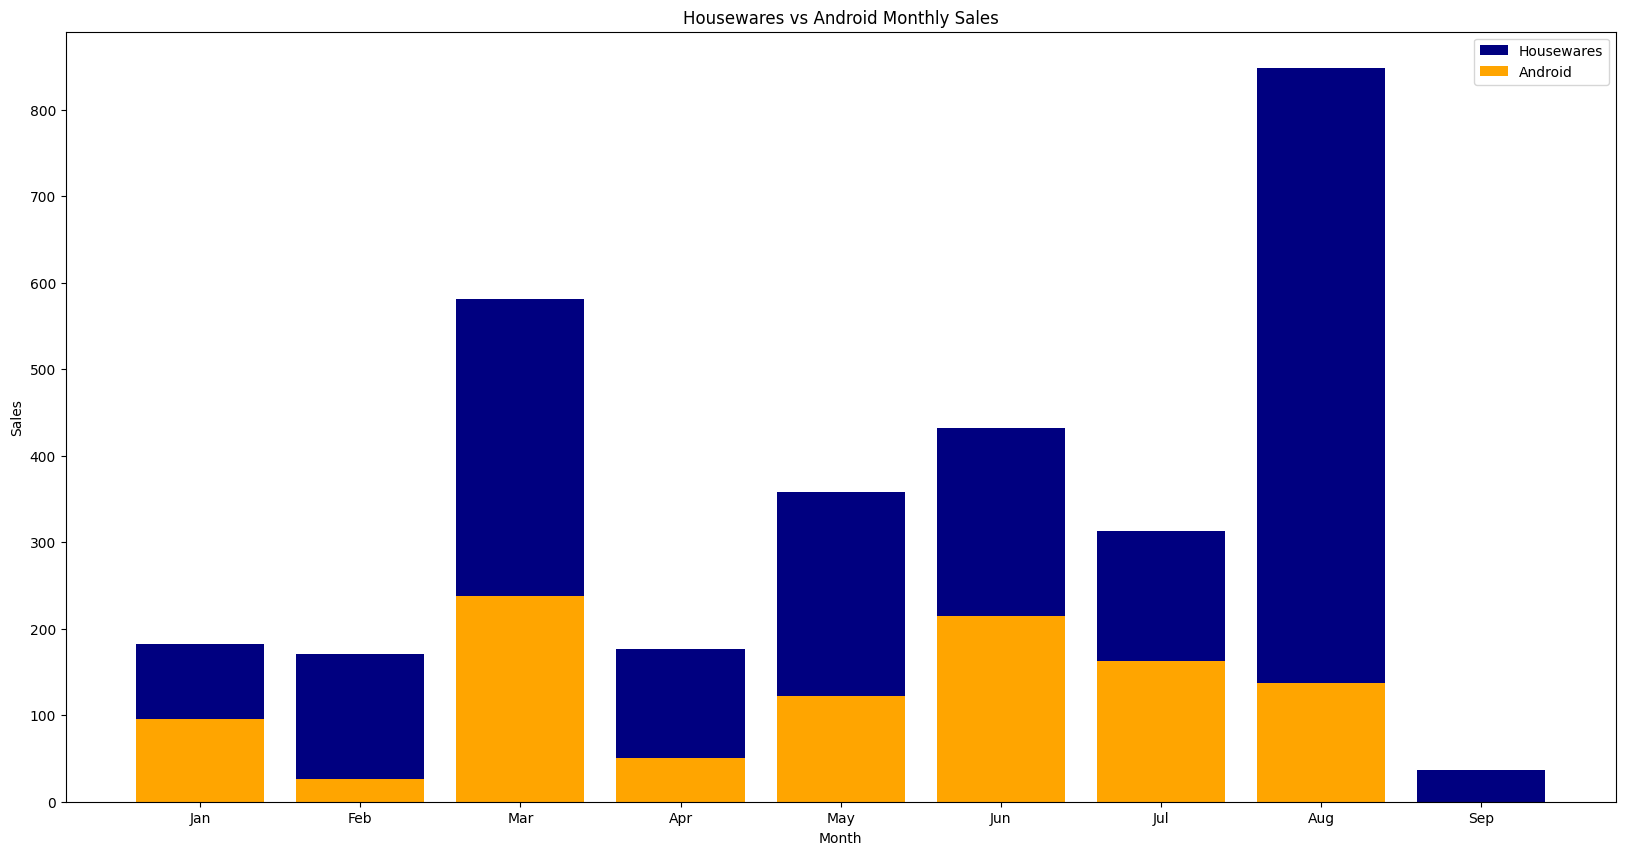

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(housewares_monthly_sales["Month"], housewares_monthly_sales["Purchase_Amount"],color="navy", label="Housewares")
plt.bar(android_monthly_sales["Month"], android_monthly_sales["Purchase_Amount"],color="orange", label="Android")
plt.title('Housewares vs Android Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()

📌 **Key takeaway:** Android product category had lowest performance both revenue and volumn.
> Suggestions: stop purchase this product category. Save resources to other products.

## Correlation Matrix

# **Model Building**

The research of objective is to determine factors influence the sales performance.

## *Simple Linear Regression: Delivery Charges vs Quantity*

In [ ]:
mid_low_data = merged_data_2[(merged_data_2['Tier'] == 'Low') | (merged_data_2['Tier'] == 'Mid')]
mid_low_data.describe()

,CustomerID,Transaction_ID,Transaction_Date,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,Discount_pct,Purchase_Amount,Discount_Amount,Gross_Revenue
count,34920.000000,34920.000000,34920,34920.000000,34920.000000,34920.000000,34920.000000,34920.000000,34920.000000,34920.000000,34920.000000
mean,15343.292153,31895.596048,2019-06-30 00:53:36.494845184,3.738001,14.584263,9.858775,26.163574,0.198783,39.093829,2.108592,31.343646
min,12346.000000,16681.000000,2019-01-01 00:00:00,1.000000,0.390000,0.000000,2.000000,0.100000,4.120000,0.000000,0.400000
25%,13846.000000,25548.000000,2019-04-14 00:00:00,1.000000,3.800000,6.000000,15.000000,0.100000,14.541000,0.000000,7.980000
50%,15311.000000,32258.500000,2019-07-10 00:00:00,1.000000,10.630000,6.000000,27.000000,0.200000,21.990000,0.000000,15.190000
75%,17017.000000,37584.000000,2019-09-06 00:00:00,2.000000,17.530000,6.500000,37.000000,0.300000,40.090000,1.299000,31.350000
max,18283.000000,48494.000000,2019-12-31 00:00:00,60.000000,152.880000,75.000000,50.000000,0.300000,2805.500000,335.916000,2799.500000
std,1771.209694,8023.591842,NaN,7.666803,16.226582,10.011039,13.444187,0.080826,66.003592,8.524278,67.042533


In [ ]:
Q1=mid_low_data["Avg_Price"].quantile(0.25)
Q3=mid_low_data["Avg_Price"].quantile(0.75)

IQR=Q3-Q1

upper_bound=Q3+1.5*IQR
lower_bound=Q3-1.5*IQR

In [ ]:
upper_bound

np.float64(38.125)

In [ ]:
Q=mid_low_data["Avg_Price"].quantile(0.75)
Q

np.float64(17.53)

In [ ]:
mid_low_data=mid_low_data[(mid_low_data["Avg_Price"] <= upper_bound)]

In [ ]:
mid_low_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32058 entries, 2 to 51092
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           32058 non-null  int64         
 1   Transaction_ID       32058 non-null  int64         
 2   Transaction_Date     32058 non-null  datetime64[ns]
 3   Product_SKU          32058 non-null  string        
 4   Product_Description  32058 non-null  string        
 5   Product_Category     32058 non-null  string        
 6   Quantity             32058 non-null  int64         
 7   Avg_Price            32058 non-null  float64       
 8   Delivery_Charges     32058 non-null  float64       
 9   Coupon_Status        32058 non-null  string        
 10  Gender               32058 non-null  category      
 11  Location             32058 non-null  string        
 12  Tenure_Months        32058 non-null  int64         
 13  Month                32058 non-null 

In [ ]:
numeric_cols=mid_low_data.select_dtypes(include=[np.number]).columns.tolist()
num_df=mid_low_data[numeric_cols]

correlation_matrix=num_df.corr()
correlation_matrix

,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,Discount_pct,Purchase_Amount,Discount_Amount,Gross_Revenue
CustomerID,1.000000,-0.090236,-0.001887,0.029777,0.033139,-0.015067,0.002450,0.005138,-0.004456,-0.001441
Transaction_ID,-0.090236,1.000000,-0.026381,-0.119846,-0.107027,0.025445,0.186784,-0.053400,0.019618,-0.031009
Quantity,-0.001887,-0.026381,1.000000,-0.236448,0.235356,-0.007088,0.004397,0.633846,0.294854,0.625603
Avg_Price,0.029777,-0.119846,-0.236448,1.000000,-0.054538,0.000913,0.030130,0.135914,0.081911,0.155442
Delivery_Charges,0.033139,-0.107027,0.235356,-0.054538,1.000000,-0.014348,0.007651,0.360220,0.094349,0.191077
Tenure_Months,-0.015067,0.025445,-0.007088,0.000913,-0.014348,1.000000,0.023339,-0.003530,0.000697,-0.000837
Discount_pct,0.002450,0.186784,0.004397,0.030130,0.007651,0.023339,1.000000,0.001882,0.102200,0.014667
Purchase_Amount,0.005138,-0.053400,0.633846,0.135914,0.360220,-0.003530,0.001882,1.000000,0.376331,0.976653
Discount_Amount,-0.004456,0.019618,0.294854,0.081911,0.094349,0.000697,0.102200,0.376331,1.000000,0.493891
Gross_Revenue,-0.001441,-0.031009,0.625603,0.155442,0.191077,-0.000837,0.014667,0.976653,0.493891,1.000000


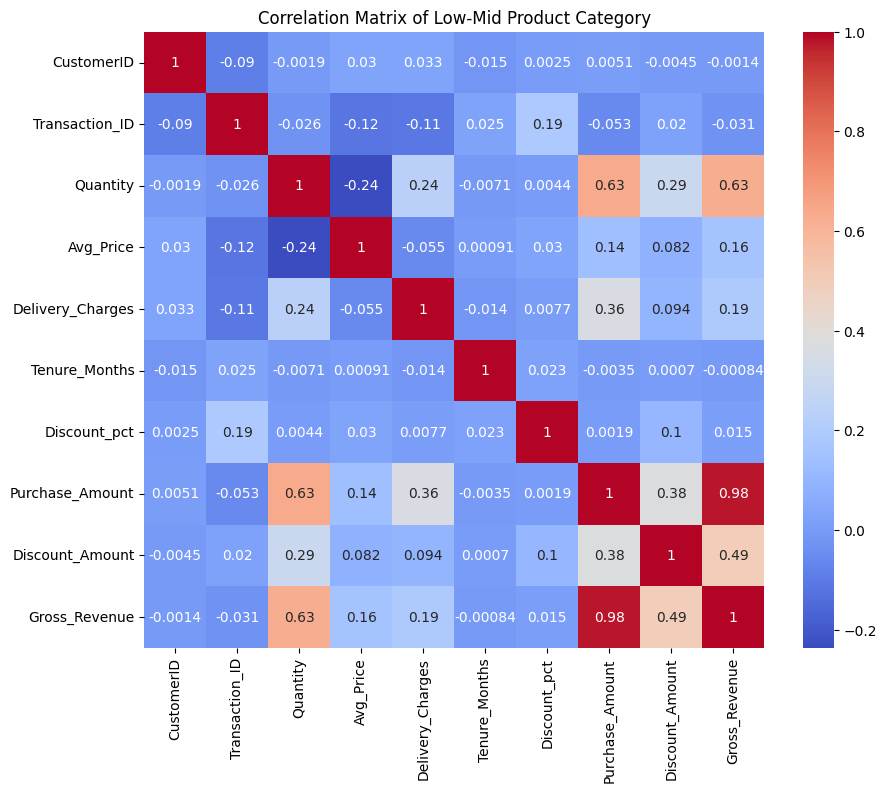

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Low-Mid Product Category')
plt.show()

In [ ]:
#Q=mid_low_data["Delivery_Charges"].quantile(0.90)
#con2=mid_low_data["Delivery_Charges"] <= Q

In [ ]:
#Q=mid_low_data["Quantity"].quantile(0.90)
#con3=mid_low_data["Quantity"] <= Q

In [ ]:
#mid_low_data=mid_low_data[con1 & con3]

In [ ]:
X = mid_low_data[["Delivery_Charges","Discount_pct"]]
y = mid_low_data['Quantity']

# Add constant for intercept
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X.astype(float)).fit()

# Show results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     940.0
Date:                Fri, 15 Aug 2025   Prob (F-statistic):               0.00
Time:                        10:46:34   Log-Likelihood:            -1.1096e+05
No. Observations:               32058   AIC:                         2.219e+05
Df Residuals:                   32055   BIC:                         2.220e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.0582      0.122  

In [ ]:
numeric_cols=mid_low_data.select_dtypes(include=[np.number]).columns.tolist()
num_df=mid_low_data[numeric_cols]

## Data Preparation: Linear Regression: Discount vs Sales (mid product cat)

In [ ]:
mid_tier_data = merged_data_2[merged_data_2['Tier'] == 'Mid']
mid_tier_data.describe()

,CustomerID,Transaction_ID,Transaction_Date,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,Discount_pct,Purchase_Amount,Discount_Amount,Gross_Revenue
count,20566.000000,20566.000000,20566,20566.000000,20566.000000,20566.000000,20566.000000,20566.000000,20566.000000,20566.000000,20566.000000
mean,15335.075659,32148.592823,2019-07-03 00:13:14.009530112,1.894778,20.572008,8.808388,26.164641,0.200272,39.412220,2.220936,32.824768
min,12346.000000,16682.000000,2019-01-01 00:00:00,1.000000,0.990000,6.000000,2.000000,0.100000,7.782000,0.000000,1.590000
25%,13817.000000,26166.000000,2019-04-21 00:00:00,1.000000,10.630000,6.000000,15.000000,0.100000,17.310000,0.000000,11.750000
50%,15311.000000,32526.000000,2019-07-13 00:00:00,1.000000,15.190000,6.000000,27.000000,0.200000,23.490000,0.000000,16.990000
75%,17001.000000,37401.000000,2019-09-05 00:00:00,1.000000,20.990000,6.500000,37.000000,0.300000,40.090000,1.760000,33.590000
max,18283.000000,48494.000000,2019-12-31 00:00:00,60.000000,152.880000,75.000000,50.000000,0.300000,2805.500000,335.916000,2799.500000
std,1773.121276,7842.041836,NaN,4.038788,18.160690,8.308055,13.429812,0.080679,69.149657,8.988889,71.231226


In [ ]:
Q1 = mid_tier_data["Avg_Price"].quantile(0.25)
Q3 = mid_tier_data["Avg_Price"].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR

In [ ]:
lower_bound

np.float64(5.450000000000003)

In [ ]:
upper_bound

np.float64(36.529999999999994)

In [ ]:
con1 = (mid_tier_data["Avg_Price"] <= upper_bound) & (mid_tier_data["Avg_Price"] >= lower_bound)

In [ ]:
Q1 = mid_tier_data["Quantity"].quantile(0.25)
Q3 = mid_tier_data["Quantity"].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR

In [ ]:
lower_bound

np.float64(1.0)

In [ ]:
upper_bound

np.float64(1.0)

In [ ]:
Q=mid_tier_data["Quantity"].quantile(0.95)
Q

np.float64(5.0)

In [ ]:
con2=mid_tier_data["Quantity"] <= upper_bound

In [ ]:
mid_tier_data_cleaned=mid_tier_data[(con1 & con2)]

In [ ]:
features=mid_tier_data[["Quantity","Avg_Price","Tenure_Months","Discount_pct","Purchase_Amount","Discount_Amount","Gross_Revenue"]]
correlation_matrix=features.corr()
correlation_matrix

,Quantity,Avg_Price,Tenure_Months,Discount_pct,Purchase_Amount,Discount_Amount,Gross_Revenue
Quantity,1.000000,-0.083915,-0.002835,0.001416,0.673952,0.323322,0.676651
Avg_Price,-0.083915,1.000000,0.003352,0.020180,0.294692,0.159868,0.306309
Tenure_Months,-0.002835,0.003352,1.000000,0.027963,0.009748,0.013416,0.011516
Discount_pct,0.001416,0.020180,0.027963,1.000000,0.000451,0.110137,0.011670
Purchase_Amount,0.673952,0.294692,0.009748,0.000451,1.000000,0.326828,0.986038
Discount_Amount,0.323322,0.159868,0.013416,0.110137,0.326828,1.000000,0.437260
Gross_Revenue,0.676651,0.306309,0.011516,0.011670,0.986038,0.437260,1.000000


In [ ]:
mid_tier_data = mid_tier_data[(mid_tier_data["Quantity"] <= 10)]
mid_tier_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20133 entries, 3 to 51100
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           20133 non-null  int64         
 1   Transaction_ID       20133 non-null  int64         
 2   Transaction_Date     20133 non-null  datetime64[ns]
 3   Product_SKU          20133 non-null  string        
 4   Product_Description  20133 non-null  string        
 5   Product_Category     20133 non-null  string        
 6   Quantity             20133 non-null  int64         
 7   Avg_Price            20133 non-null  float64       
 8   Delivery_Charges     20133 non-null  float64       
 9   Coupon_Status        20133 non-null  string        
 10  Gender               20133 non-null  category      
 11  Location             20133 non-null  string        
 12  Tenure_Months        20133 non-null  int64         
 13  Month                20133 non-null 

In [ ]:
one_hot_encoded_data=pd.get_dummies(mid_tier_data,columns=["Coupon_Status","Location"])
one_hot_encoded_data

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Gender,...,Gross_Revenue,Tier,Coupon_Status_Clicked,Coupon_Status_Not Used,Coupon_Status_Used,Location_California,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,M,...,87.65,Mid,False,True,False,False,True,False,False,False
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,M,...,16.50,Mid,False,False,True,False,True,False,False,False
12,13047,16682,2019-01-01,GGOEYAAB031816,YouTube Men's Short Sleeve Hero Tee Black,Apparel,5,17.53,6.5,M,...,87.65,Mid,False,False,True,True,False,False,False,False
15,13047,16685,2019-01-01,GGOEGAAR010714,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,1,14.02,6.5,M,...,14.02,Mid,False,False,True,True,False,False,False,False
16,13047,16685,2019-01-01,GGOEGAEQ027913,Google Women's Short Sleeve Hero Tee White,Apparel,1,14.02,6.5,M,...,14.02,Mid,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51086,12956,48482,2019-12-31,GGOEGAEJ028116,Google Women's Short Sleeve Badge Tee Grey,Apparel,4,3.47,6.5,F,...,13.88,Mid,True,False,False,False,True,False,False,False
51087,12956,48482,2019-12-31,GGOEGAEQ027917,Google Women's Short Sleeve Hero Tee White,Apparel,4,3.47,6.5,F,...,13.88,Mid,False,False,True,False,True,False,False,False
51091,15781,48489,2019-12-31,GGOEGAEQ027917,Google Women's Short Sleeve Hero Tee White,Apparel,1,3.47,6.5,M,...,3.47,Mid,False,False,True,False,False,True,False,False
51092,15781,48489,2019-12-31,GGOEGAXB089228,Google Trike Tee Black,Apparel,1,16.30,6.5,M,...,16.30,Mid,False,False,True,False,False,True,False,False


In [ ]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20133 entries, 3 to 51100
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CustomerID              20133 non-null  int64         
 1   Transaction_ID          20133 non-null  int64         
 2   Transaction_Date        20133 non-null  datetime64[ns]
 3   Product_SKU             20133 non-null  string        
 4   Product_Description     20133 non-null  string        
 5   Product_Category        20133 non-null  string        
 6   Quantity                20133 non-null  int64         
 7   Avg_Price               20133 non-null  float64       
 8   Delivery_Charges        20133 non-null  float64       
 9   Gender                  20133 non-null  category      
 10  Tenure_Months           20133 non-null  int64         
 11  Month                   20133 non-null  object        
 12  Discount_pct            20133 non-null  float64    

#### Linear Regression delivery vs quantity mid tier

In [ ]:
X = one_hot_encoded_data["Delivery_Charges"]
y = one_hot_encoded_data['Quantity']

# Add constant for intercept
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X.astype(float)).fit()

# Show results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     893.7
Date:                Fri, 15 Aug 2025   Prob (F-statistic):          3.62e-192
Time:                        10:46:37   Log-Likelihood:                -32698.
No. Observations:               20133   AIC:                         6.540e+04
Df Residuals:                   20131   BIC:                         6.542e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.1222      0.013  

#### Linear Regression Mid tier discount vs sales

In [ ]:
X = one_hot_encoded_data[['Coupon_Status_Clicked','Coupon_Status_Not Used','Coupon_Status_Used','Discount_pct',"Tenure_Months"]]
y = one_hot_encoded_data['Gross_Revenue']

# Add constant for intercept
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X.astype(float)).fit()

# Show results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Gross_Revenue   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4319
Date:                Fri, 15 Aug 2025   Prob (F-statistic):              0.786
Time:                        10:46:37   Log-Likelihood:                -98353.
No. Observations:               20133   AIC:                         1.967e+05
Df Residuals:                   20128   BIC:                         1.968e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     19

In [ ]:
X = one_hot_encoded_data['Avg_Price']
y = one_hot_encoded_data['Quantity']

# Add constant for intercept
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()

# Show results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     211.8
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           9.87e-48
Time:                        10:46:37   Log-Likelihood:                -33030.
No. Observations:               20133   AIC:                         6.606e+04
Df Residuals:                   20131   BIC:                         6.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5467      0.013    116.120      0.0

In [ ]:
numeric_cols = mid_tier_data.select_dtypes(include=[np.number]).columns.tolist()
num_df = mid_tier_data[numeric_cols]

In [ ]:
correlation_matrix = num_df.corr()
correlation_matrix

,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,Discount_pct,Purchase_Amount,Discount_Amount,Gross_Revenue
CustomerID,1.000000,-0.075083,0.002116,0.029509,0.021330,-0.021567,0.001963,0.021797,0.010214,0.018122
Transaction_ID,-0.075083,1.000000,0.008280,-0.169536,-0.101759,0.030707,0.210710,-0.138229,0.000002,-0.113102
Quantity,0.002116,0.008280,1.000000,-0.102030,0.206171,-0.000487,-0.005791,0.495034,0.198585,0.476130
Avg_Price,0.029509,-0.169536,-0.102030,1.000000,0.007642,0.001147,0.020916,0.607644,0.285873,0.652688
Delivery_Charges,0.021330,-0.101759,0.206171,0.007642,1.000000,-0.000461,0.020517,0.369073,0.048665,0.126883
Tenure_Months,-0.021567,0.030707,-0.000487,0.001147,-0.000461,1.000000,0.031657,0.003217,0.007826,0.004579
Discount_pct,0.001963,0.210710,-0.005791,0.020916,0.020517,0.031657,1.000000,-0.011350,0.154712,0.007902
Purchase_Amount,0.021797,-0.138229,0.495034,0.607644,0.369073,0.003217,-0.011350,1.000000,0.302259,0.958092
Discount_Amount,0.010214,0.000002,0.198585,0.285873,0.048665,0.007826,0.154712,0.302259,1.000000,0.448881
Gross_Revenue,0.018122,-0.113102,0.476130,0.652688,0.126883,0.004579,0.007902,0.958092,0.448881,1.000000


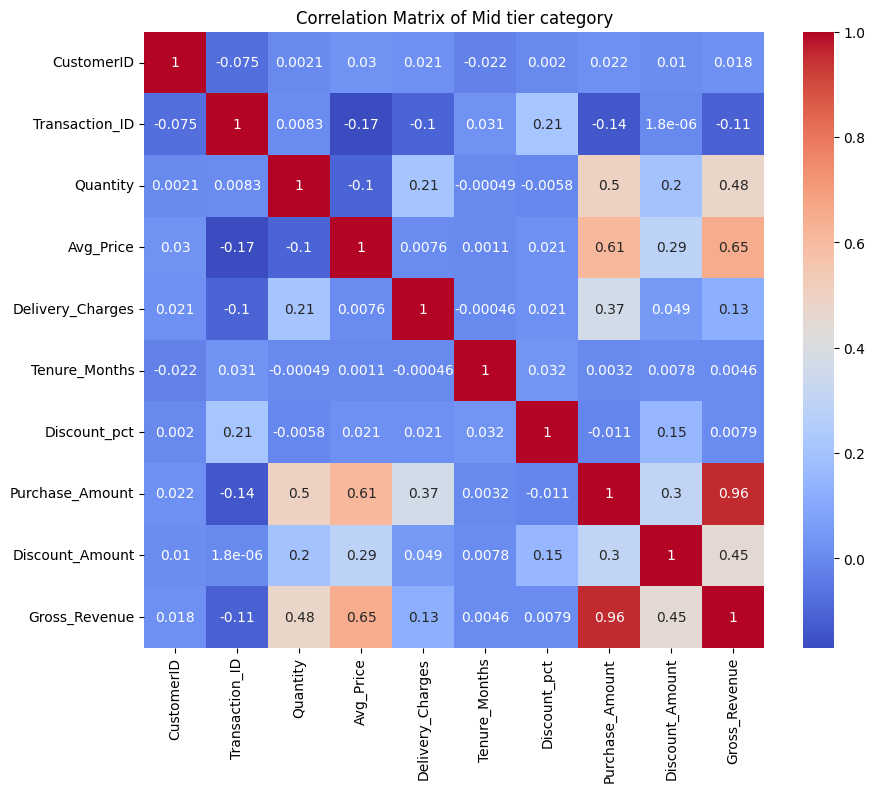

In [ ]:
figure=plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.title("Correlation Matrix of Mid tier category")
plt.show()

## Linear Regression: Discount vs Sales (full no filter)

In [ ]:
final_df_filtered=final_df[(final_df["Coupon_Status"]=="Used")]
final_df_filtered

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Month,Discount_pct,Purchase_Amount,Discount_Amount,Gross_Revenue
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Jan,0.1,144.839,15.371,153.71
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Jan,0.1,144.839,15.371,153.71
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,M,Chicago,12,Jan,0.1,8.345,0.205,2.05
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,M,Chicago,12,Jan,0.1,21.350,1.650,16.50
5,17850,16682,2019-01-01,GGOEGBMJ013399,Sport Bag,Bags,15,5.15,6.5,Used,M,Chicago,12,Jan,0.1,76.025,7.725,77.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51477,12956,48482,2019-12-31,GGOEGAEQ027917,Google Women's Short Sleeve Hero Tee White,Apparel,4,3.47,6.5,Used,F,Chicago,48,Dec,0.3,16.216,4.164,13.88
51481,15781,48489,2019-12-31,GGOEGAEQ027917,Google Women's Short Sleeve Hero Tee White,Apparel,1,3.47,6.5,Used,M,New Jersey,19,Dec,0.3,8.929,1.041,3.47
51482,15781,48489,2019-12-31,GGOEGAXB089228,Google Trike Tee Black,Apparel,1,16.30,6.5,Used,M,New Jersey,19,Dec,0.3,17.910,4.890,16.30
51490,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.5,Used,F,New York,45,Dec,0.3,40.744,14.676,48.92


In [ ]:
final_df_filtered.describe()

,CustomerID,Transaction_ID,Transaction_Date,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,Discount_pct,Purchase_Amount,Discount_Amount,Gross_Revenue
count,17300.000000,17300.000000,17300,17300.000000,17300.000000,17300.000000,17300.000000,17300.000000,17300.000000,17300.000000,17300.000000
mean,15358.736994,32431.900809,2019-07-06 02:21:10.196532224,2.995549,50.020058,8.991710,26.135318,0.199341,71.943125,15.822241,78.773655
min,12346.000000,16679.000000,2019-01-01 00:00:00,1.000000,0.400000,0.000000,2.000000,0.100000,4.185000,0.040000,0.400000
25%,13963.000000,25425.500000,2019-04-12 00:00:00,1.000000,5.700000,6.000000,15.000000,0.100000,16.560000,1.760000,11.200000
50%,15311.000000,32664.000000,2019-07-14 00:00:00,1.000000,16.990000,6.000000,27.000000,0.200000,33.376000,5.546500,27.990000
75%,17019.000000,39083.000000,2019-09-26 00:00:00,2.000000,100.910000,6.500000,37.000000,0.300000,110.300000,23.700000,119.000000
max,18283.000000,48495.000000,2019-12-31 00:00:00,60.000000,279.000000,75.000000,50.000000,0.300000,1128.910000,335.916000,1395.000000
std,1769.106150,8596.155319,NaN,6.327035,57.652416,8.749847,13.461870,0.081446,84.495826,23.862095,104.750970


In [ ]:
Q1 = final_df_filtered["Quantity"].quantile(0.25)

Q3 = final_df_filtered["Quantity"].quantile(0.75)

IQR= Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR

In [ ]:
upper_bound

np.float64(3.5)

In [ ]:
con1=final_df_filtered["Quantity"] <= upper_bound

In [ ]:
Q1 = final_df_filtered["Avg_Price"].quantile(0.25)

Q3 = final_df_filtered["Avg_Price"].quantile(0.75)

IQR= Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR

In [ ]:
upper_bound

np.float64(243.725)

In [ ]:
con2=final_df_filtered["Avg_Price"] <= upper_bound

In [ ]:
Q1 = final_df_filtered["Tenure_Months"].quantile(0.25)

Q3 = final_df_filtered["Tenure_Months"].quantile(0.75)

IQR= Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR

In [ ]:
upper_bound

np.float64(70.0)

In [ ]:
Q1 = final_df_filtered["Purchase_Amount"].quantile(0.25)

Q3 = final_df_filtered["Purchase_Amount"].quantile(0.75)

IQR= Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR

In [ ]:
upper_bound

np.float64(250.90999999999997)

In [ ]:
con3=final_df_filtered["Purchase_Amount"] <= upper_bound

In [ ]:
Q1 = final_df_filtered["Discount_Amount"].quantile(0.25)

Q3 = final_df_filtered["Discount_Amount"].quantile(0.75)

IQR= Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR

In [ ]:
upper_bound

np.float64(56.61)

In [ ]:
con4=final_df_filtered["Discount_Amount"] <= upper_bound

In [ ]:
final_df_filtered_cleaned = final_df_filtered[(((con1 & con2) & con3) & con4)]

In [ ]:
final_df_filtered_cleaned

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Month,Discount_pct,Purchase_Amount,Discount_Amount,Gross_Revenue
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Jan,0.1,144.839,15.371,153.71
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Jan,0.1,144.839,15.371,153.71
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,M,Chicago,12,Jan,0.1,8.345,0.205,2.05
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,M,Chicago,12,Jan,0.1,21.350,1.650,16.50
14,13047,16684,2019-01-01,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,1,81.50,6.5,Used,M,California,43,Jan,0.1,79.850,8.150,81.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51472,12956,48478,2019-12-31,GGOEGDWQ087699,Google Hub Mug White,Drinkware,1,10.59,6.5,Used,F,Chicago,48,Dec,0.3,13.913,3.177,10.59
51481,15781,48489,2019-12-31,GGOEGAEQ027917,Google Women's Short Sleeve Hero Tee White,Apparel,1,3.47,6.5,Used,M,New Jersey,19,Dec,0.3,8.929,1.041,3.47
51482,15781,48489,2019-12-31,GGOEGAXB089228,Google Trike Tee Black,Apparel,1,16.30,6.5,Used,M,New Jersey,19,Dec,0.3,17.910,4.890,16.30
51490,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.5,Used,F,New York,45,Dec,0.3,40.744,14.676,48.92


In [ ]:
final_df_filtered_cleaned["Gross_Revenue"] = final_df_filtered_cleaned["Avg_Price"] * final_df_filtered_cleaned["Quantity"]

/tmp/ipython-input-2129375927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_filtered_cleaned["Gross_Revenue"] = final_df_filtered_cleaned["Avg_Price"] * final_df_filtered_cleaned["Quantity"]


In [ ]:
x = final_df_filtered_cleaned["Discount_pct"]
y = final_df_filtered_cleaned["Gross_Revenue"]

# Add constant for intercept
X = sm.add_constant(x)
# Fit regression model
model = sm.OLS(y, X).fit()

# Show results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Gross_Revenue   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     66.56
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           3.69e-16
Time:                        10:46:41   Log-Likelihood:                -77238.
No. Observations:               13887   AIC:                         1.545e+05
Df Residuals:                   13885   BIC:                         1.545e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           66.3649      1.409     47.103   

In [ ]:
x = final_df_filtered_cleaned[["Discount_pct","Delivery_Charges"]]
y = final_df_filtered_cleaned["Quantity"]

# Add constant for intercept
X = sm.add_constant(x)
# Fit regression model
model = sm.OLS(y, X).fit()

# Show results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     75.34
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           2.87e-33
Time:                        10:46:41   Log-Likelihood:                -9787.4
No. Observations:               13887   AIC:                         1.958e+04
Df Residuals:                   13884   BIC:                         1.960e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.2025      0.012  

## Linear Regression: Gender

### Data preparation

In [ ]:
reference_date = final_df['Transaction_Date'].max()

# Group by 'CustomerID' and apply aggregation functions
customer_df = final_df.groupby('CustomerID').agg(
    # Recency: Calculate the difference in days between the reference date and the last purchase date
    Days_since_last_purchase=('Transaction_Date', lambda x: (reference_date - x.max()).days),

    # Monetary Value: Calculate the mean of the purchase amount
    Avg_monetary_value=('Purchase_Amount', 'mean'),

    # Tenure: Get the maximum tenure for each customer (assuming it's cumulative)
    Tenure=('Tenure_Months', 'max'),

    # Discount Sensitivity: Calculate the average discount percentage used by the customer
    Discount_Sensitivity=('Discount_pct', 'mean'),

    # Frequency: Count the total number of transactions for each customer
    Frequency=('CustomerID', 'size'),

    Quantity=('Quantity', 'sum'),

    Gender=('Gender', lambda x: x.mode()[0] if not x.mode().empty else None)
).reset_index()

# Rename the columns for clarity
customer_df.columns = ['CustomerID', 'Days_since_last_purchase', 'Avg_monetary_value', 'Tenure', 'Discount_Sensitivity', 'Frequency', 'Quantity', "Gender"]

# Display the resulting DataFrame
customer_df

In [ ]:
customer_df.describe()

In [ ]:
Q1 = customer_df['Days_since_last_purchase'].quantile(0.25)
Q3 = customer_df['Days_since_last_purchase'].quantile(0.75)

# IQR calculation
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR

In [ ]:
upper_bound

In [ ]:
Q1 = customer_df['Avg_monetary_value'].quantile(0.25)
Q3 = customer_df['Avg_monetary_value'].quantile(0.75)

# IQR calculation
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR

In [ ]:
upper_bound

In [ ]:
con1 = customer_df["Avg_monetary_value"] <= upper_bound

In [ ]:
Q1 = customer_df['Frequency'].quantile(0.25)
Q3 = customer_df['Frequency'].quantile(0.75)

# IQR calculation
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR

In [ ]:
upper_bound

In [ ]:
con2=customer_df["Frequency"] <= upper_bound

In [ ]:
Q1 = customer_df['Quantity'].quantile(0.25)
Q3 = customer_df['Quantity'].quantile(0.75)

# IQR calculation
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR

In [ ]:
upper_bound

In [ ]:
con3=customer_df["Quantity"] <= upper_bound

In [ ]:
customer_df_cleaned=customer_df[((con1 & con2) & con3)]

In [ ]:
customer_df_cleaned.describe()

In [ ]:
customer_df_cleaned

### Correlation Matrix

In [ ]:
features=customer_df_cleaned[["Days_since_last_purchase","Avg_monetary_value","Tenure","Discount_Sensitivity","Frequency","Quantity"]]
correlation_matrix=features.corr()
correlation_matrix

In [ ]:
figure=plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.title("Correlation Matrix of Mid tier category")
plt.show()

In [ ]:
one_hot_encoded_data=pd.get_dummies(customer_df_cleaned,columns=["Gender"])
one_hot_encoded_data.sample()

In [ ]:
x=one_hot_encoded_data[["Tenure", "Days_since_last_purchase", "Gender_F", "Gender_M"]]
y=one_hot_encoded_data["Discount_Sensitivity"]

X=sm.add_constant(x)
model=sm.OLS(y,X.astype(float)).fit()
print(model.summary())

## Linear Regression Apparel product

In [ ]:
apparel_avg_df = apparel_df.groupby("Avg_Price")["Transaction_ID"].count()
apparel_avg_df.sort_values(ascending=False)

,Transaction_ID
Avg_Price,
13.59,1492
16.99,1017
15.19,773
15.99,736
10.63,606
...,...
57.99,1
59.83,1
4.99,1


In [ ]:
apparel_filtered_df=apparel_df[(apparel_df["Avg_Price"]>=13) & (apparel_df["Avg_Price"]<=30) & (apparel_df["Quantity"]==1)]

In [ ]:
apparel_filtered_df.describe()

,CustomerID,Transaction_ID,Transaction_Date,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,Discount_pct,Purchase_Amount,Discount_Amount,Gross_Revenue
count,7515.000000,7515.000000,7515,7515.0,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000
mean,15397.937059,31346.097671,2019-06-23 04:54:07.904191744,1.0,17.381387,8.423203,26.230872,0.204298,24.592445,1.212145,17.381387
min,12346.000000,16685.000000,2019-01-01 00:00:00,1.0,13.000000,6.000000,2.000000,0.100000,15.240000,0.000000,13.000000
25%,13983.000000,25104.000000,2019-04-08 00:00:00,1.0,14.020000,6.000000,15.000000,0.100000,19.592000,0.000000,14.020000
50%,15370.000000,30773.000000,2019-06-19 00:00:00,1.0,16.790000,6.000000,27.000000,0.200000,22.490000,0.000000,16.790000
75%,17035.000000,36746.000000,2019-08-27 00:00:00,1.0,19.190000,6.500000,37.000000,0.300000,26.490000,1.980000,19.190000
max,18283.000000,48489.000000,2019-12-31 00:00:00,1.0,30.000000,75.000000,50.000000,0.300000,94.990000,9.000000,30.000000
std,1765.766876,8097.996931,NaN,0.0,3.794057,7.467392,13.443166,0.081794,8.404556,1.961167,3.794057


In [ ]:
features=apparel_filtered_df[["Avg_Price","Tenure_Months","Discount_pct","Purchase_Amount","Discount_Amount","Gross_Revenue"]]
correlation_matrix=features.corr()
correlation_matrix

,Avg_Price,Tenure_Months,Discount_pct,Purchase_Amount,Discount_Amount,Gross_Revenue
Avg_Price,1.000000,0.005813,0.045979,0.401072,0.156744,1.000000
Tenure_Months,0.005813,1.000000,0.039825,0.013659,0.010292,0.005813
Discount_pct,0.045979,0.039825,1.000000,-0.008255,0.257677,0.045979
Purchase_Amount,0.401072,0.013659,-0.008255,1.000000,-0.157887,0.401072
Discount_Amount,0.156744,0.010292,0.257677,-0.157887,1.000000,0.156744
Gross_Revenue,1.000000,0.005813,0.045979,0.401072,0.156744,1.000000


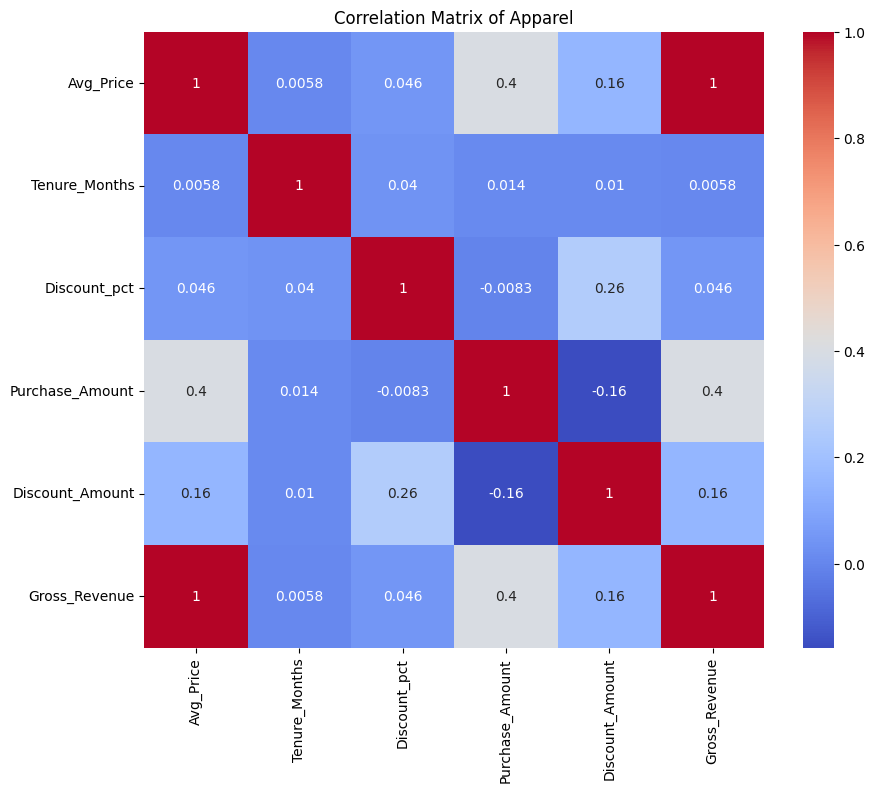

In [ ]:
figure=plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.title("Correlation Matrix of Apparel")
plt.show()

In [ ]:
x=apparel_filtered_df["Discount_pct"]
y=apparel_filtered_df["Gross_Revenue"]

X=sm.add_constant(x)
model=sm.OLS(y,X.astype(float)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Gross_Revenue   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     15.92
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           6.68e-05
Time:                        10:52:10   Log-Likelihood:                -20676.
No. Observations:                7515   AIC:                         4.136e+04
Df Residuals:                    7513   BIC:                         4.137e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           16.9457      0.118    144.046   

## **Marketing Spend**

In [ ]:
mkt_spend_df['Month'] = mkt_spend_df['Date'].dt.strftime('%b')
mkt_spend_df

In [ ]:
mkt_spend_df["Total_mkt_spend"]=mkt_spend_df["Offline_Spend"] + mkt_spend_df["Online_Spend"]

In [ ]:
monthly_mkt_spend=mkt_spend_df.groupby("Month")[["Offline_Spend","Online_Spend"]].sum().reset_index()
monthly_mkt_spend

In [ ]:
monthly_mkt_spend["Total_mkt_spend"]=monthly_mkt_spend["Offline_Spend"] + monthly_mkt_spend["Online_Spend"]

In [ ]:
monthly_summary=pd.DataFrame(
    {'Month': monthly_sales['Month'],
     'Total_Sale': monthly_sales['Purchase_Amount'],
     'Mkt_spend': monthly_mkt_spend["Total_mkt_spend"].values,
     })
monthly_summary

📌 **Key Takeaway:**
- Purchase_Amount has a strong positive correlation with Offline_Spend (0.77) and Online_Spend (0.86). The correlation is slightly stronger with online spending.
> The amount spent both offline and online increases, the total purchase amount also tends to increase.
- Discount_pct has a weak negative correlation with Purchase_Amount (-0.22).
> The purchase amount tend to be lower when a higher discount percentage is applied. However, the relationship is not very strong.




In [ ]:
apparel_df

In [ ]:
numeric_cols = final_df.select_dtypes(include=[np.number]).columns.tolist()
num_df = final_df[numeric_cols]

In [ ]:
correlation_matrix=num_df.corr()
correlation_matrix

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Apparel')
plt.show()

## Data Preparation : Linear Regression (Mkt spend vs sales)

In [ ]:
#daily_sales=final_df.groupby("Transaction_Date")["Purchase_Amount"].sum().reset_index()
#daily_sales

,Transaction_Date,Purchase_Amount
0,2019-01-01,7226.103
1,2019-01-02,13733.753
2,2019-01-03,23509.280
3,2019-01-04,17400.702
4,2019-01-05,14343.428
...,...,...
360,2019-12-27,12596.663
361,2019-12-28,9152.232
362,2019-12-29,10913.672
363,2019-12-30,6571.729


In [ ]:
#summary=pd.DataFrame(
    {'Date': mkt_spend_df['Date'],
     'Total sale': daily_sales['Purchase_Amount'],
     'Total_mkt_spend': mkt_spend_df["Total_mkt_spend"],
     })
#summary

NameError: name 'mkt_spend_df' is not defined

H0: There is no relationship between marketing spend and sales.
H1: There is relationship between marketing spend and sales.